In [1]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import statsmodels.api as sm
from colorama import Fore, Style
from scipy.optimize import fsolve, curve_fit
import yfinance as yf
import akshare as ak
import sys
sys.path.append('../src') 
from utils import plot_candlestick, get_optimum_clusters, exponential_func

from chinese_index_etf_strategy import etf_strategy, etf_regression
from chinese_commodity_strategy import commodity_strategy

## Some sample code that're working

  0%|          | 0/12 [00:00<?, ?it/s]

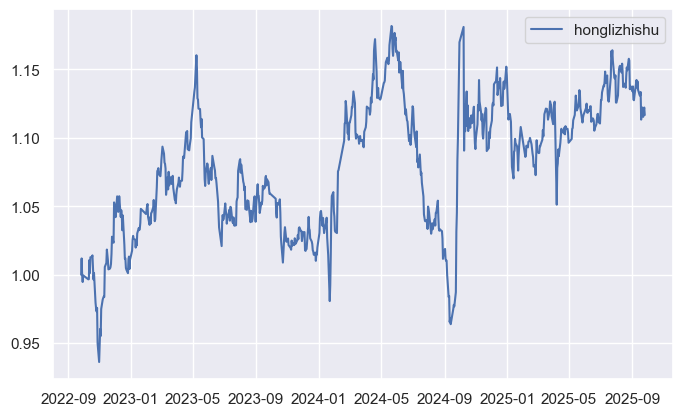

In [2]:
plt.figure(figsize=(8,4.8))

# 红利指数
etf_code = 'csi000922'
df = etf_strategy(etf_code, source="index").df
plt.plot(df['date'], df['close'] / df.iloc[0]['close'], label='honglizhishu')
# 红利etf
try:
    etf_code = '515180'
    df_1 = etf_strategy(etf_code).df
    plt.plot(df_1['date'], df_1['close'] / df_1.iloc[0]['close'], label='hongli etf')
except:
    pass
plt.legend()

In [3]:
# # Tongxin ETF, changnei, history
# etf_code = "sh515880"  # ETF代码
# etf_hist = ak.fund_etf_hist_sina(symbol=etf_code)
# etf_hist.tail()

date   open   high    low  close     volume
1463  2025-09-18  2.562  2.724  2.560  2.655  942795427
1464  2025-09-19  2.686  2.730  2.634  2.681  678130073
1465  2025-09-22  2.682  2.724  2.603  2.712  544122882
1466  2025-09-23  2.808  2.838  2.644  2.734  898556434
1467  2025-09-24  2.652  2.748  2.629  2.716  730647072

In [4]:
# # Tongxin ETF, changnei, realtime
# df = ak.fund_etf_spot_ths()
# df[df['基金代码']=='515880']

序号    基金代码           基金名称  当前-单位净值  当前-累计净值  前一日-单位净值  前一日-累计净值  \
1230  1231  515880  国泰中证全指通信设备ETF   2.7124   2.7124    2.7307    2.7307   

         增长值   增长率 赎回状态 申购状态      最新-交易日  最新-单位净值  最新-累计净值 基金类型        查询日期  
1230 -0.0183 -0.67   开放   开放  2025-09-24   2.7124   2.7124  股票型  2025-09-24

In [5]:
# # Tongxin ETF, changnei, lishi and shishi
# etf_code = "515880"  # ETF代码
# start_date = (datetime.today() - relativedelta(years=3)).strftime('%Y%m%d')   # 开始日期
# end_date = datetime.today().strftime('%Y%m%d')  # 结束日期

# try:
#     etf_hist = ak.fund_etf_hist_em(symbol=etf_code, period="daily", start_date=start_date, end_date=end_date, adjust="")
#     etf_hist.rename(columns={"日期": 'date', "开盘": 'open', "收盘": 'close', "最高": 'high', "最低": 'low', "成交量": 'volume', "成交额": 'amount'}, inplace=True)
#     etf_hist.tail()
# except:
#     pass

In [6]:
# # Huangjin, history
# spot_hist_sge_df = ak.spot_hist_sge(symbol='Au99.99')
# spot_hist_sge_df['date']= pd.to_datetime(spot_hist_sge_df['date'])
# spot_hist_sge_df.tail()

date   open   close     low    high
2125 2025-09-18  832.8  824.59  822.00  837.00
2126 2025-09-19  830.0  826.71  823.00  830.00
2127 2025-09-22  827.0  839.50  827.00  845.00
2128 2025-09-23  843.0  850.65  840.10  850.88
2129 2025-09-24  854.0  856.63  848.75  856.80

In [8]:
# # Huangjin, realtime
# spot_quotations_sge_df = ak.spot_quotations_sge(symbol="Au99.99")
# spot_quotations_sge_df[spot_quotations_sge_df['时间'] == spot_quotations_sge_df['时间'].max()]

品种        时间     现价                  更新时间
147  Au99.99  02:27:00  848.2  2025年09月25日 02:27:55

In [9]:
# spot_quotations_sge_df[spot_quotations_sge_df['时间'] == spot_quotations_sge_df['时间'].max()]['现价']

147    848.2
Name: 现价, dtype: float64

## ALL ETFs

Break all resistance; record max etf price
* Current etf price: 0.85 ~ up 0.9 , down 0.83
* Recent high: 0.9
* Current etf price is at 94.76% of recent high
Latest 20 Day MA: 0.84
Latest lower Bollinger Band, 20MA: 0.82
Latest higher Bollinger Band, 20MA: 0.87
Latest 50 Day MA: 0.82
Latest lower Bollinger Band, 50MA: 0.74
Latest higher Bollinger Band, 50MA: 0.89
Latest 50 Day EMA: 0.82
Latest 120 Day MA: 0.76
Latest 200 Day MA: 0.75
Latest 200 Day EMA: 0.77
Latest 10 Week MA: 0.82
Latest 20 Week MA: 0.78
Latest 30 Week MA: 0.76
Latest 40 Week MA: 0.75
Latest Lower Weekly Bollinger Band, 20MA: 0.67
Latest Higher Weekly Bollinger Band, 20MA: 0.89

Latest RSI: 46.07 
Latest MACD Divergence: -0.003 
20MA break point: 0.84
20MA lower Bollinger Band break point: 0.82
20MA Upper Bollinger Band break point: 0.87
50MA break point: 0.82
50MA lower Bollinger Band break point: 0.74
50MA Upper Bollinger Band break point: 0.9
120MA break point: 0.76
200MA break point: 0.75
[[0.67340845]
 [0.72982184

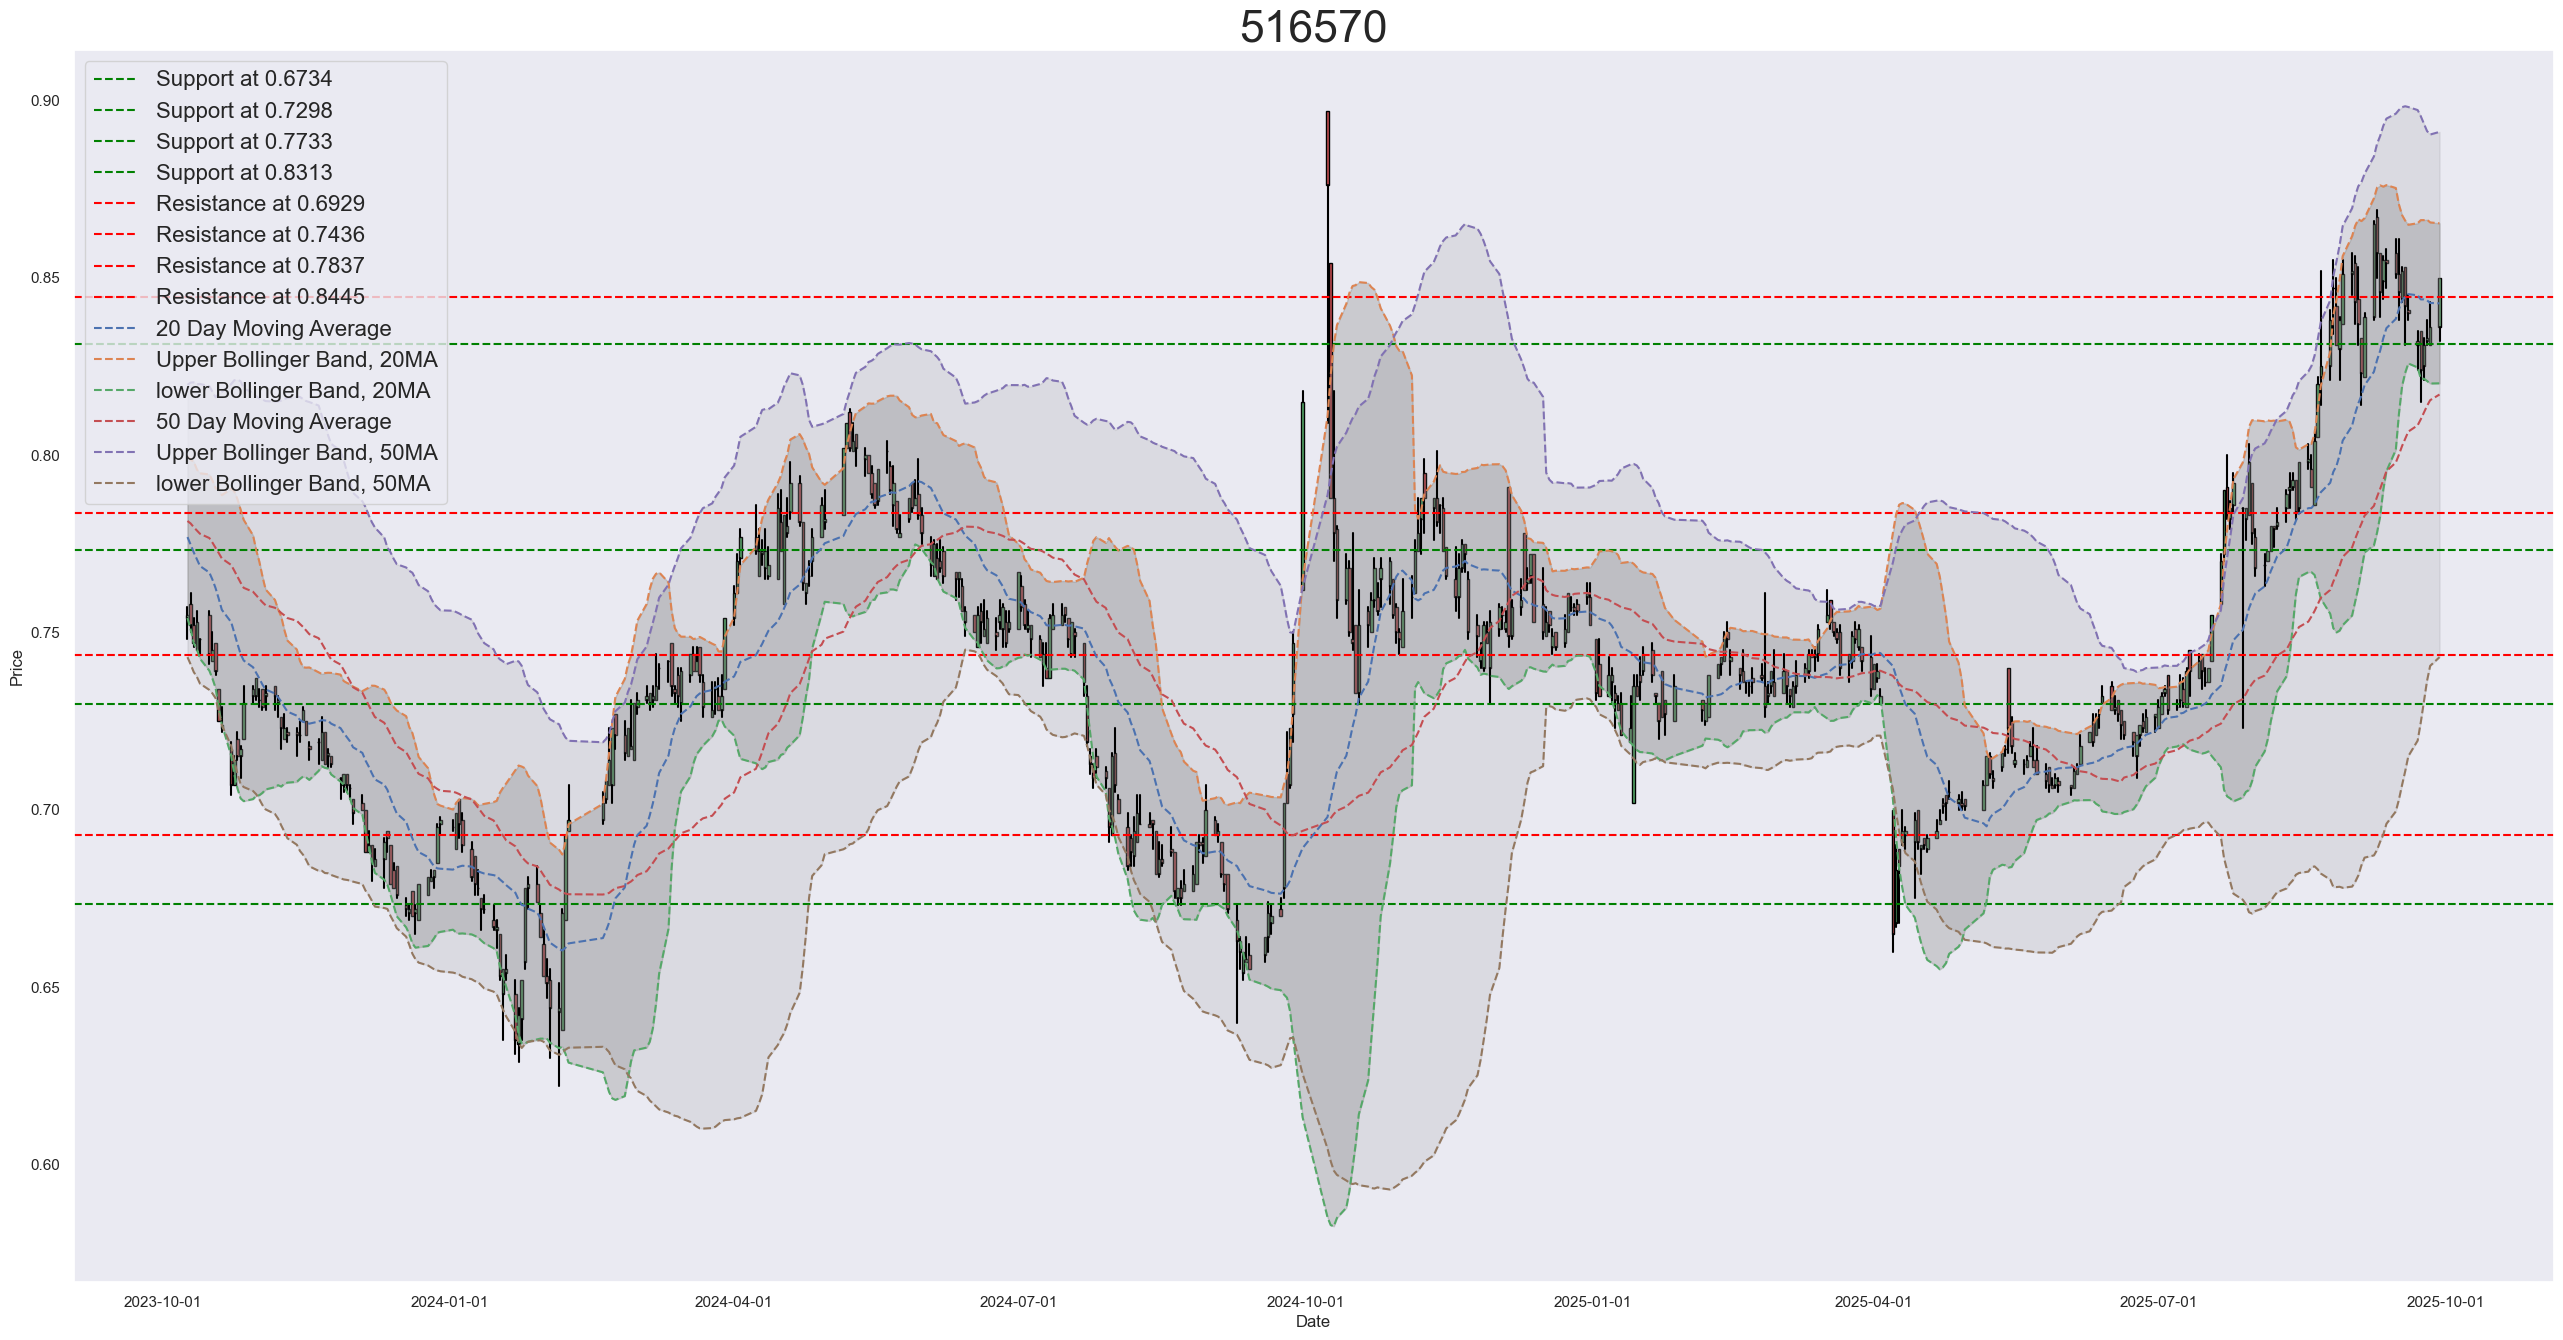

In [5]:
# 石油石化
# 指数：CSIH11057
etf_code = "516570"
try:
    stg = etf_strategy(etf_code, strategy='daily')
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 1.37
* Recent high: 1.6
* Current etf price is at 85.81% of recent high
Latest 20 Day MA: 1.43
Latest lower Bollinger Band, 20MA: 1.36
Latest higher Bollinger Band, 20MA: 1.5
Latest 50 Day MA: 1.48
Latest lower Bollinger Band, 50MA: 1.36
Latest higher Bollinger Band, 50MA: 1.59
Latest 50 Day EMA: 1.46
Latest 120 Day MA: 1.45
Latest 200 Day MA: 1.39
Latest 200 Day EMA: 1.39
Latest 10 Week MA: 1.46
Latest 20 Week MA: 1.47
Latest 30 Week MA: 1.43
Latest 40 Week MA: 1.4
Latest Lower Weekly Bollinger Band, 20MA: 1.36
Latest Higher Weekly Bollinger Band, 20MA: 1.59

Latest RSI: 26.11 
Latest MACD Divergence: -0.0043 
20MA crosses 50MA at 2.91
20MA break point: 1.43
20MA lower Bollinger Band break point: 1.35
20MA Upper Bollinger Band break point: 1.51
50MA break point: 1.47
50MA lower Bollinger Band break point: 1.35
50MA Upper Bollinger Band break point: 1.6
120MA break point: 1.45
200MA break point: 1.39


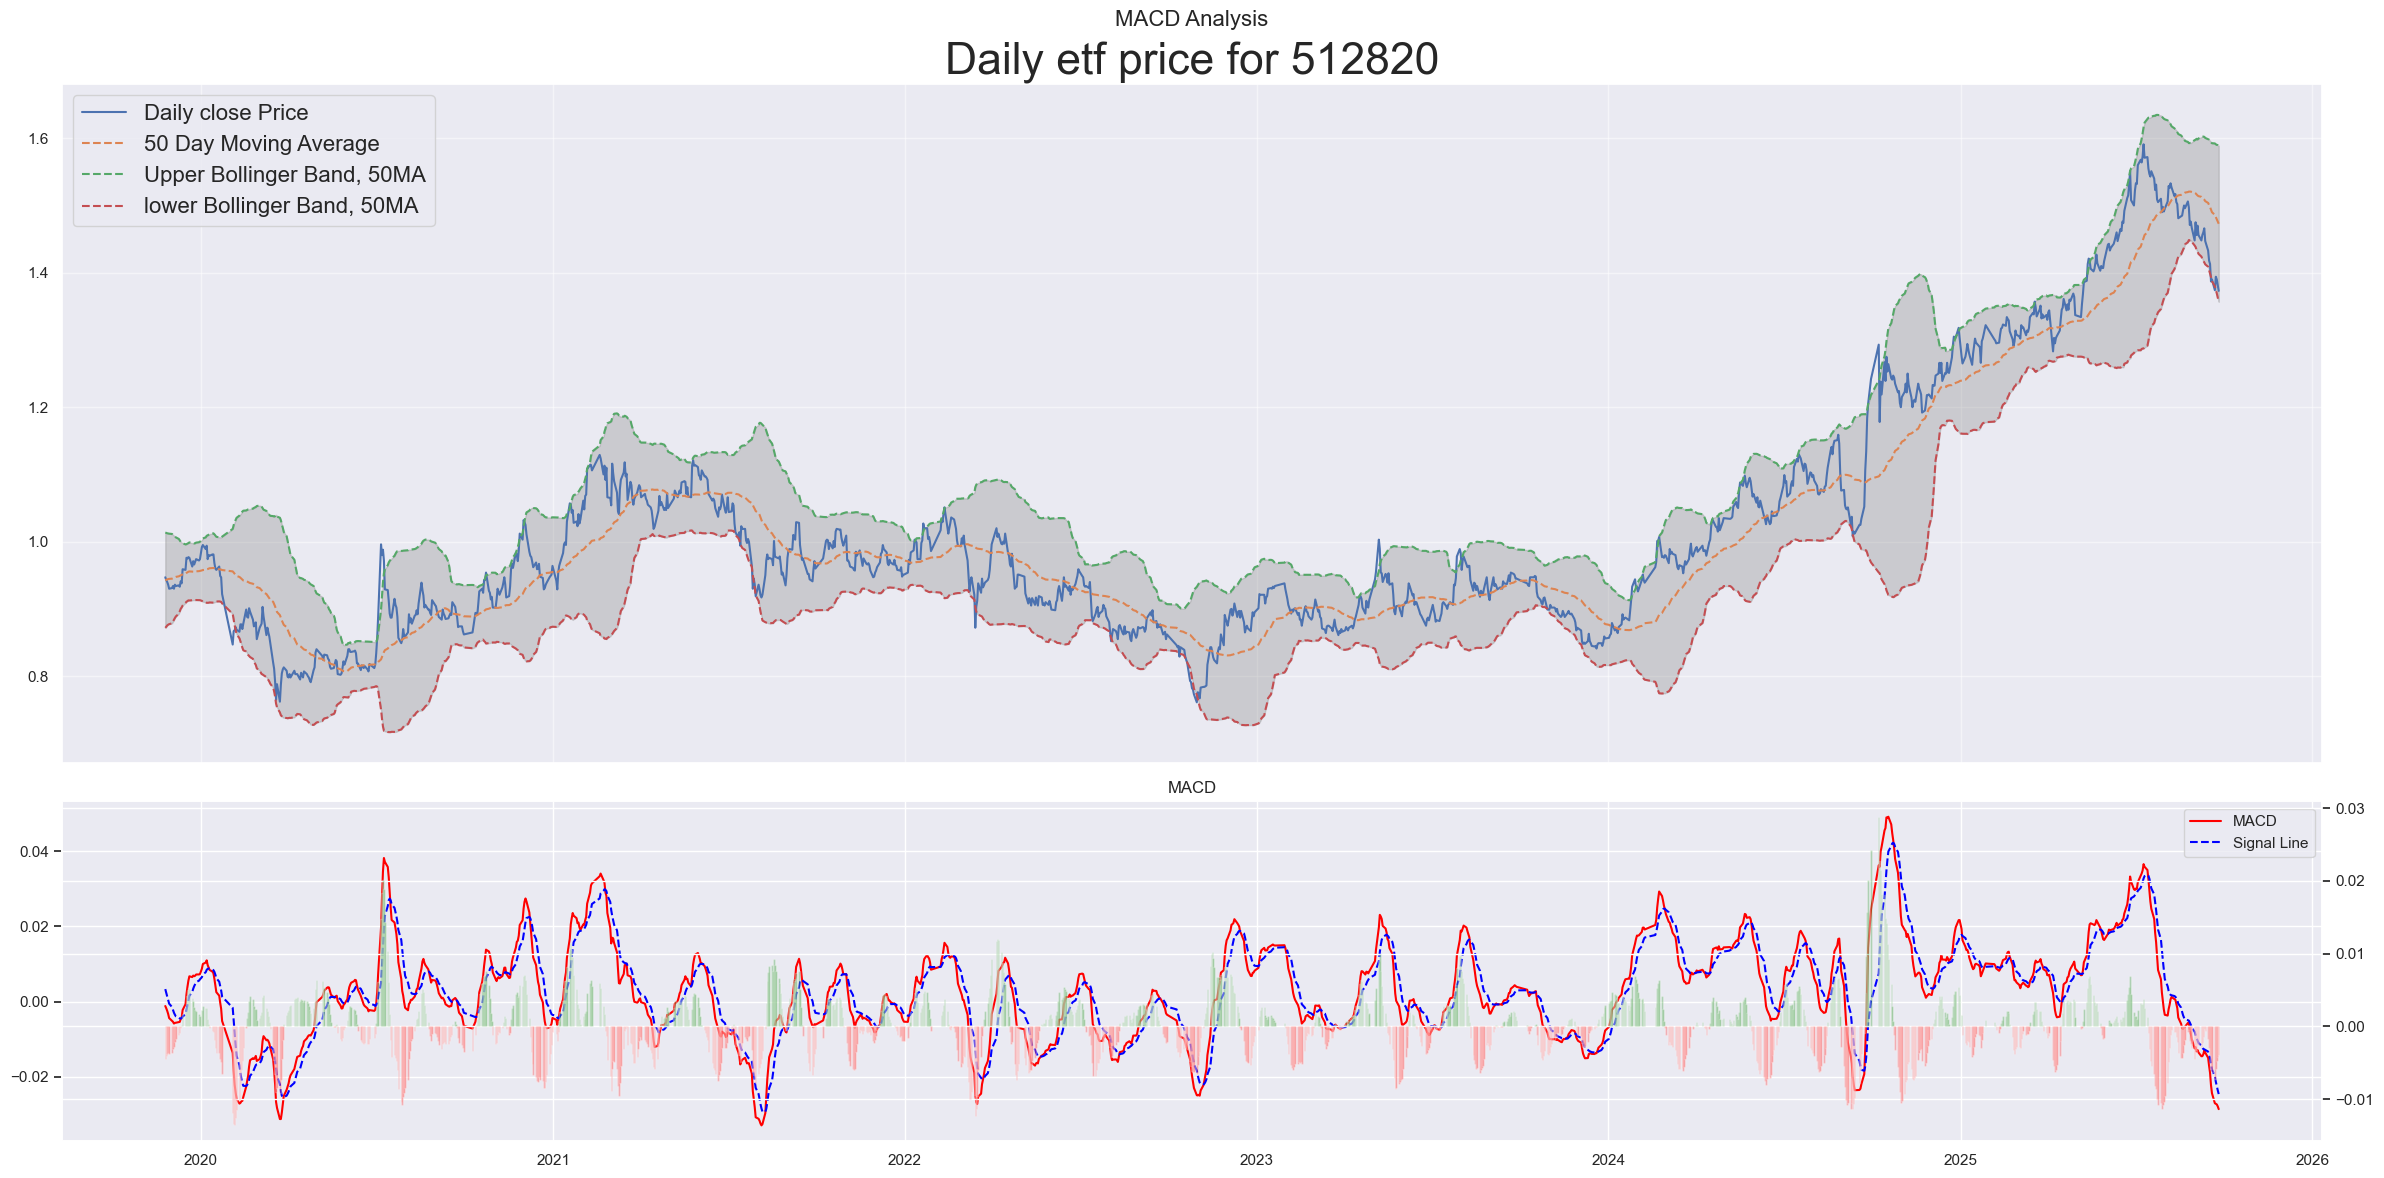

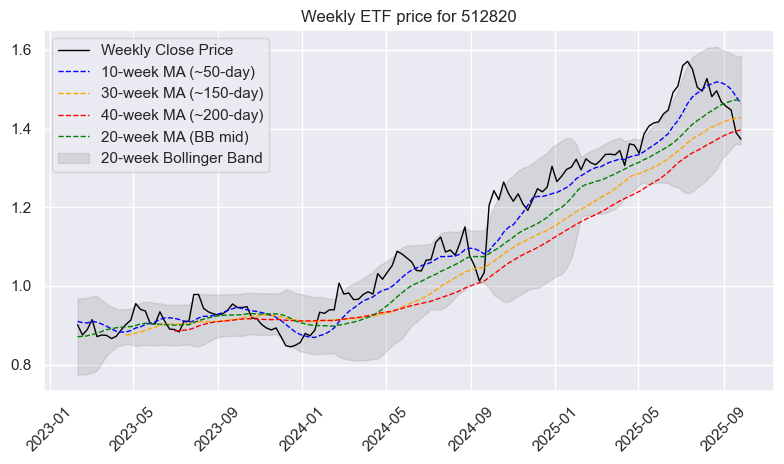

Current RSI: 22.15 
Current MACD Divergence: -0.0034 
Tomorrow inferred RSI: 20.0 
Tomorrow inferred MACD Divergence: -0.0026 
Regression price since launch: 1.23
Regression price since 2020-03-20: 1.26


In [9]:
# 中证银行
# 指数：sz399986
etf_code = "512820"
try:
    stg = etf_strategy(etf_code, start='20180101')
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    print(f'Regression price since launch: {etf_regression(etf_code)}')
    print(f'Regression price since 2020-03-20: {etf_regression(etf_code, regression_start='20200320')}')
except:
    pass

In [ ]:
# 500低波
# 指数：CSI930782
etf_code = "512260"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 半导体
# 指数: CSIH30184
etf_code = "512480"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 环保
# 指数: sh000827
etf_code = "512580"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 创业板
# 指数: sz399006

etf_code = "159948"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 机器人
# 指数: CSIH30590

etf_code = "562500"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 人工智能
# 指数: CSI930713

etf_code = "159819"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 0.72
* Recent high: 1.04
* Current etf price is at 68.42% of recent high
Latest 20 Day MA: 0.74
Latest lower Bollinger Band, 20MA: 0.71
Latest higher Bollinger Band, 20MA: 0.76
Latest 50 Day MA: 0.72
Latest lower Bollinger Band, 50MA: 0.66
Latest higher Bollinger Band, 50MA: 0.77
Latest 50 Day EMA: 0.72
Latest 120 Day MA: 0.7
Latest 200 Day MA: 0.7
Latest 200 Day EMA: 0.7
Latest 10 Week MA: 0.72
Latest 20 Week MA: 0.7
Latest 30 Week MA: 0.7
Latest 40 Week MA: 0.69
Latest Lower Weekly Bollinger Band, 20MA: 0.66
Latest Higher Weekly Bollinger Band, 20MA: 0.75

Latest RSI: 37.04 
Latest MACD Divergence: -0.0051 
20MA crosses 50MA at 0.15
20MA break point: 0.74
20MA lower Bollinger Band break point: 0.71
20MA Upper Bollinger Band break point: 0.77
50MA break point: 0.72
50MA lower Bollinger Band break point: 0.66
50MA Upper Bollinger Band break point: 0.78
120MA break point: 0.7
200MA break point: 0.7


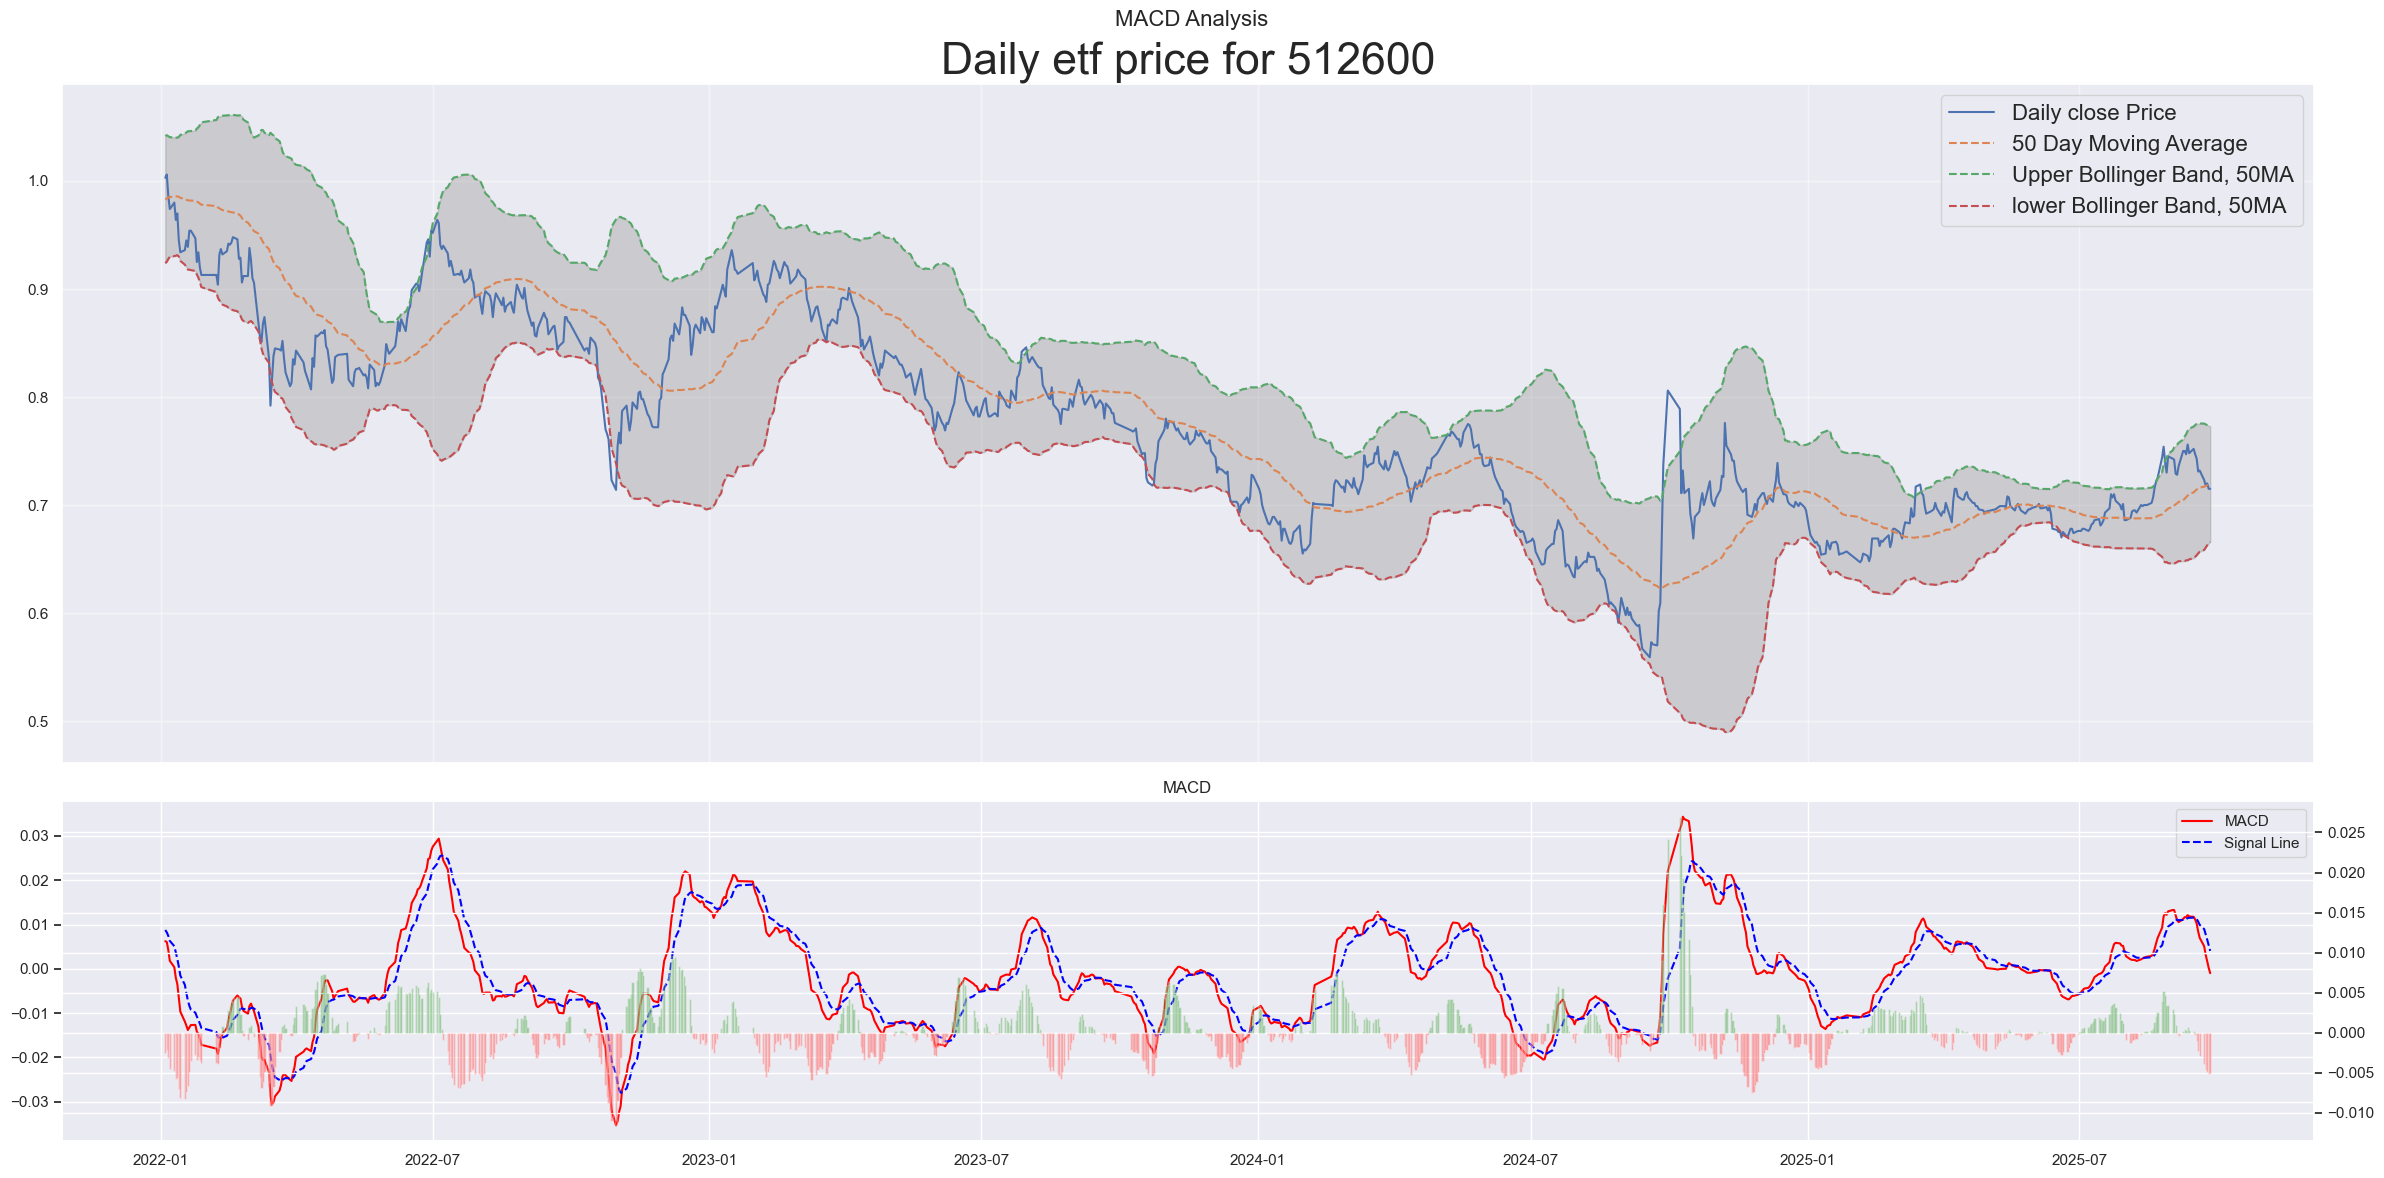

Current RSI: 23.88 
Current MACD Divergence: -0.0048 
Tomorrow inferred RSI: 25.0 
Tomorrow inferred MACD Divergence: -0.0044 


In [10]:
# 必选消费
# 指数: sh000932

etf_code = "512600"
try:
    stg = etf_strategy(etf_code, start='20210101')
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 家电
# 指数: CSI930697

etf_code = "560880"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 有色金属
# 指数: sh000819

etf_code = "512400"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 油气
# 指数: sz399439
etf_code = "159697"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 通信
# 指数: CSI931160
etf_code = "515880"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 创新药
# 指数: CSI931152
etf_code = "516080"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 中药
# 指数: CSI930641
etf_code = "159647"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 1980.35
* Recent high: 2664.74
* Current etf price is at 74.32% of recent high
Latest 20 Day MA: 1980.96
Latest lower Bollinger Band, 20MA: 1911.95
Latest higher Bollinger Band, 20MA: 2049.96
Latest 50 Day MA: 2003.33
Latest lower Bollinger Band, 50MA: 1902.09
Latest higher Bollinger Band, 50MA: 2104.56
Latest 50 Day EMA: 1981.45
Latest 120 Day MA: 1931.23
Latest 200 Day MA: 1971.44
Latest 200 Day EMA: 1994.88
Latest 10 Week MA: 1992.07
Latest 20 Week MA: 1945.54
Latest 30 Week MA: 1933.89
Latest 40 Week MA: 1948.03
Latest Lower Weekly Bollinger Band, 20MA: 1808.14
Latest Higher Weekly Bollinger Band, 20MA: 2082.94

Latest RSI: 53.01 
Latest MACD Divergence: 1.2905 
20MA crosses 50MA at 2726.07
20MA break point: 1980.99
20MA lower Bollinger Band break point: 1898.66
20MA Upper Bollinger Band break point: 2063.32
50MA break point: 2003.8
50MA lower Bollinger Band break point: 1893.41
50MA Upper Bollinger Band break point: 2114.18
120MA break point: 1930.81
200MA bre

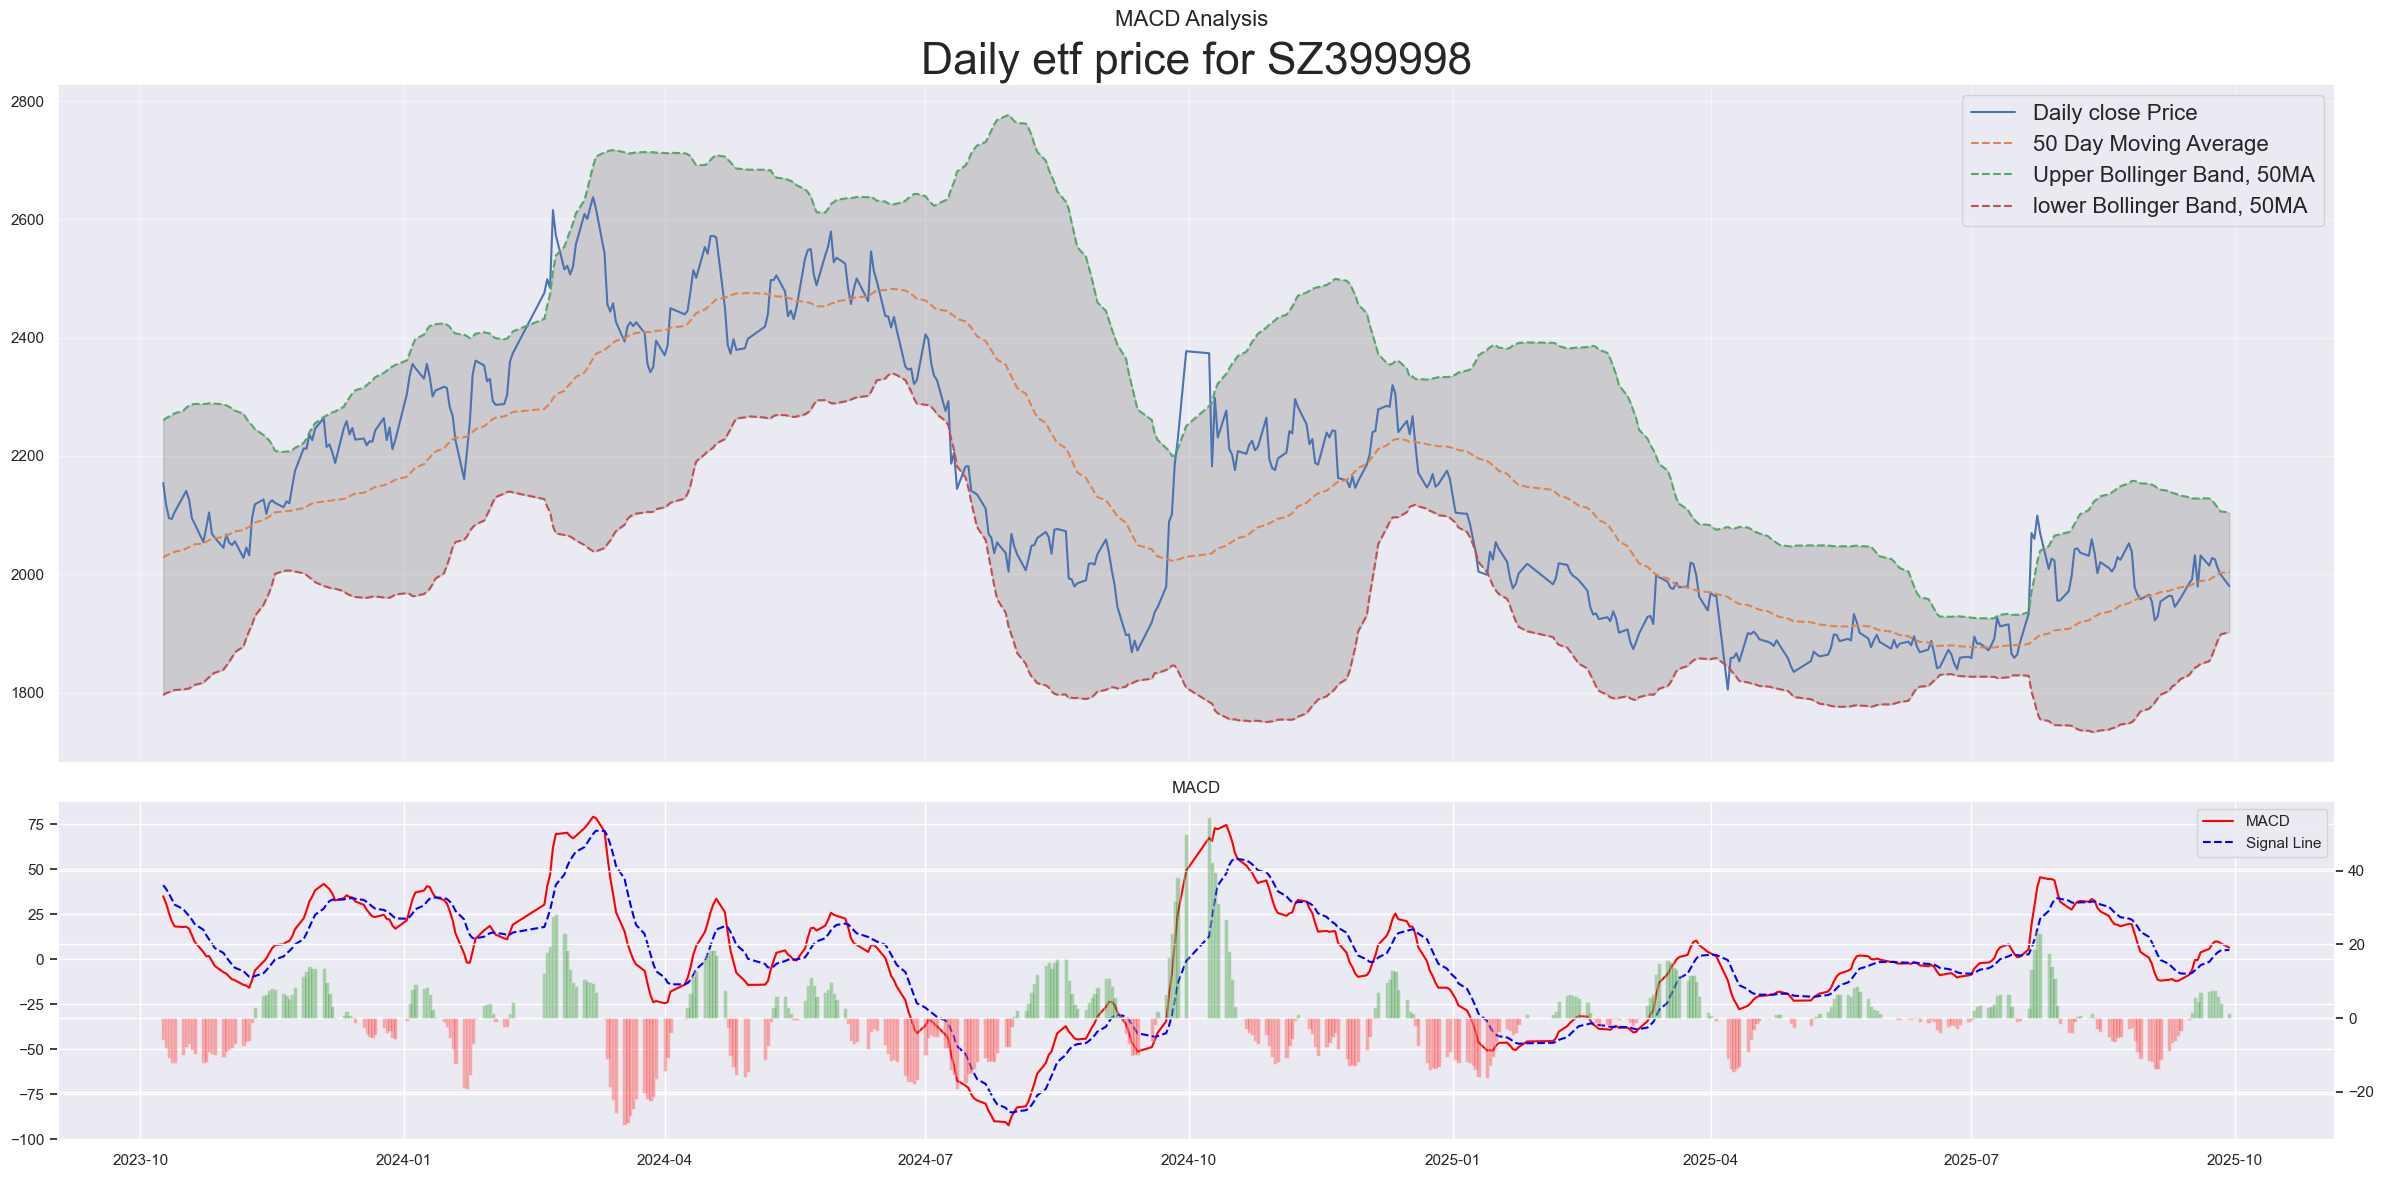

In [32]:
etf_strategy("sz399998", source='index').output()

In [ ]:
# 煤炭
etf_code = "515220"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

* Current etf price: 1.14
* Recent high: 1.24
* Current etf price is at 92.25999999999999% of recent high
Latest 20 Day MA: 1.18
Latest lower Bollinger Band, 20MA: 1.14
Latest higher Bollinger Band, 20MA: 1.21
Latest 50 Day MA: 1.19
Latest lower Bollinger Band, 50MA: 1.15
Latest higher Bollinger Band, 50MA: 1.24
Latest 50 Day EMA: 1.18
Latest 120 Day MA: 1.17
Latest 200 Day MA: 1.14
Latest 200 Day EMA: 1.15
Latest 10 Week MA: 1.19
Latest 20 Week MA: 1.18
Latest 30 Week MA: 1.16
Latest 40 Week MA: 1.14
Latest Lower Weekly Bollinger Band, 20MA: 1.14
Latest Higher Weekly Bollinger Band, 20MA: 1.23

Latest RSI: 30.43 
Latest MACD Divergence: -0.0029 
20MA crosses 50MA at 1.68
20MA break point: 1.18
20MA lower Bollinger Band break point: 1.14
20MA Upper Bollinger Band break point: 1.21
50MA break point: 1.19
50MA lower Bollinger Band break point: 1.14
50MA Upper Bollinger Band break point: 1.24
120MA break point: 1.17
200MA break point: 1.14


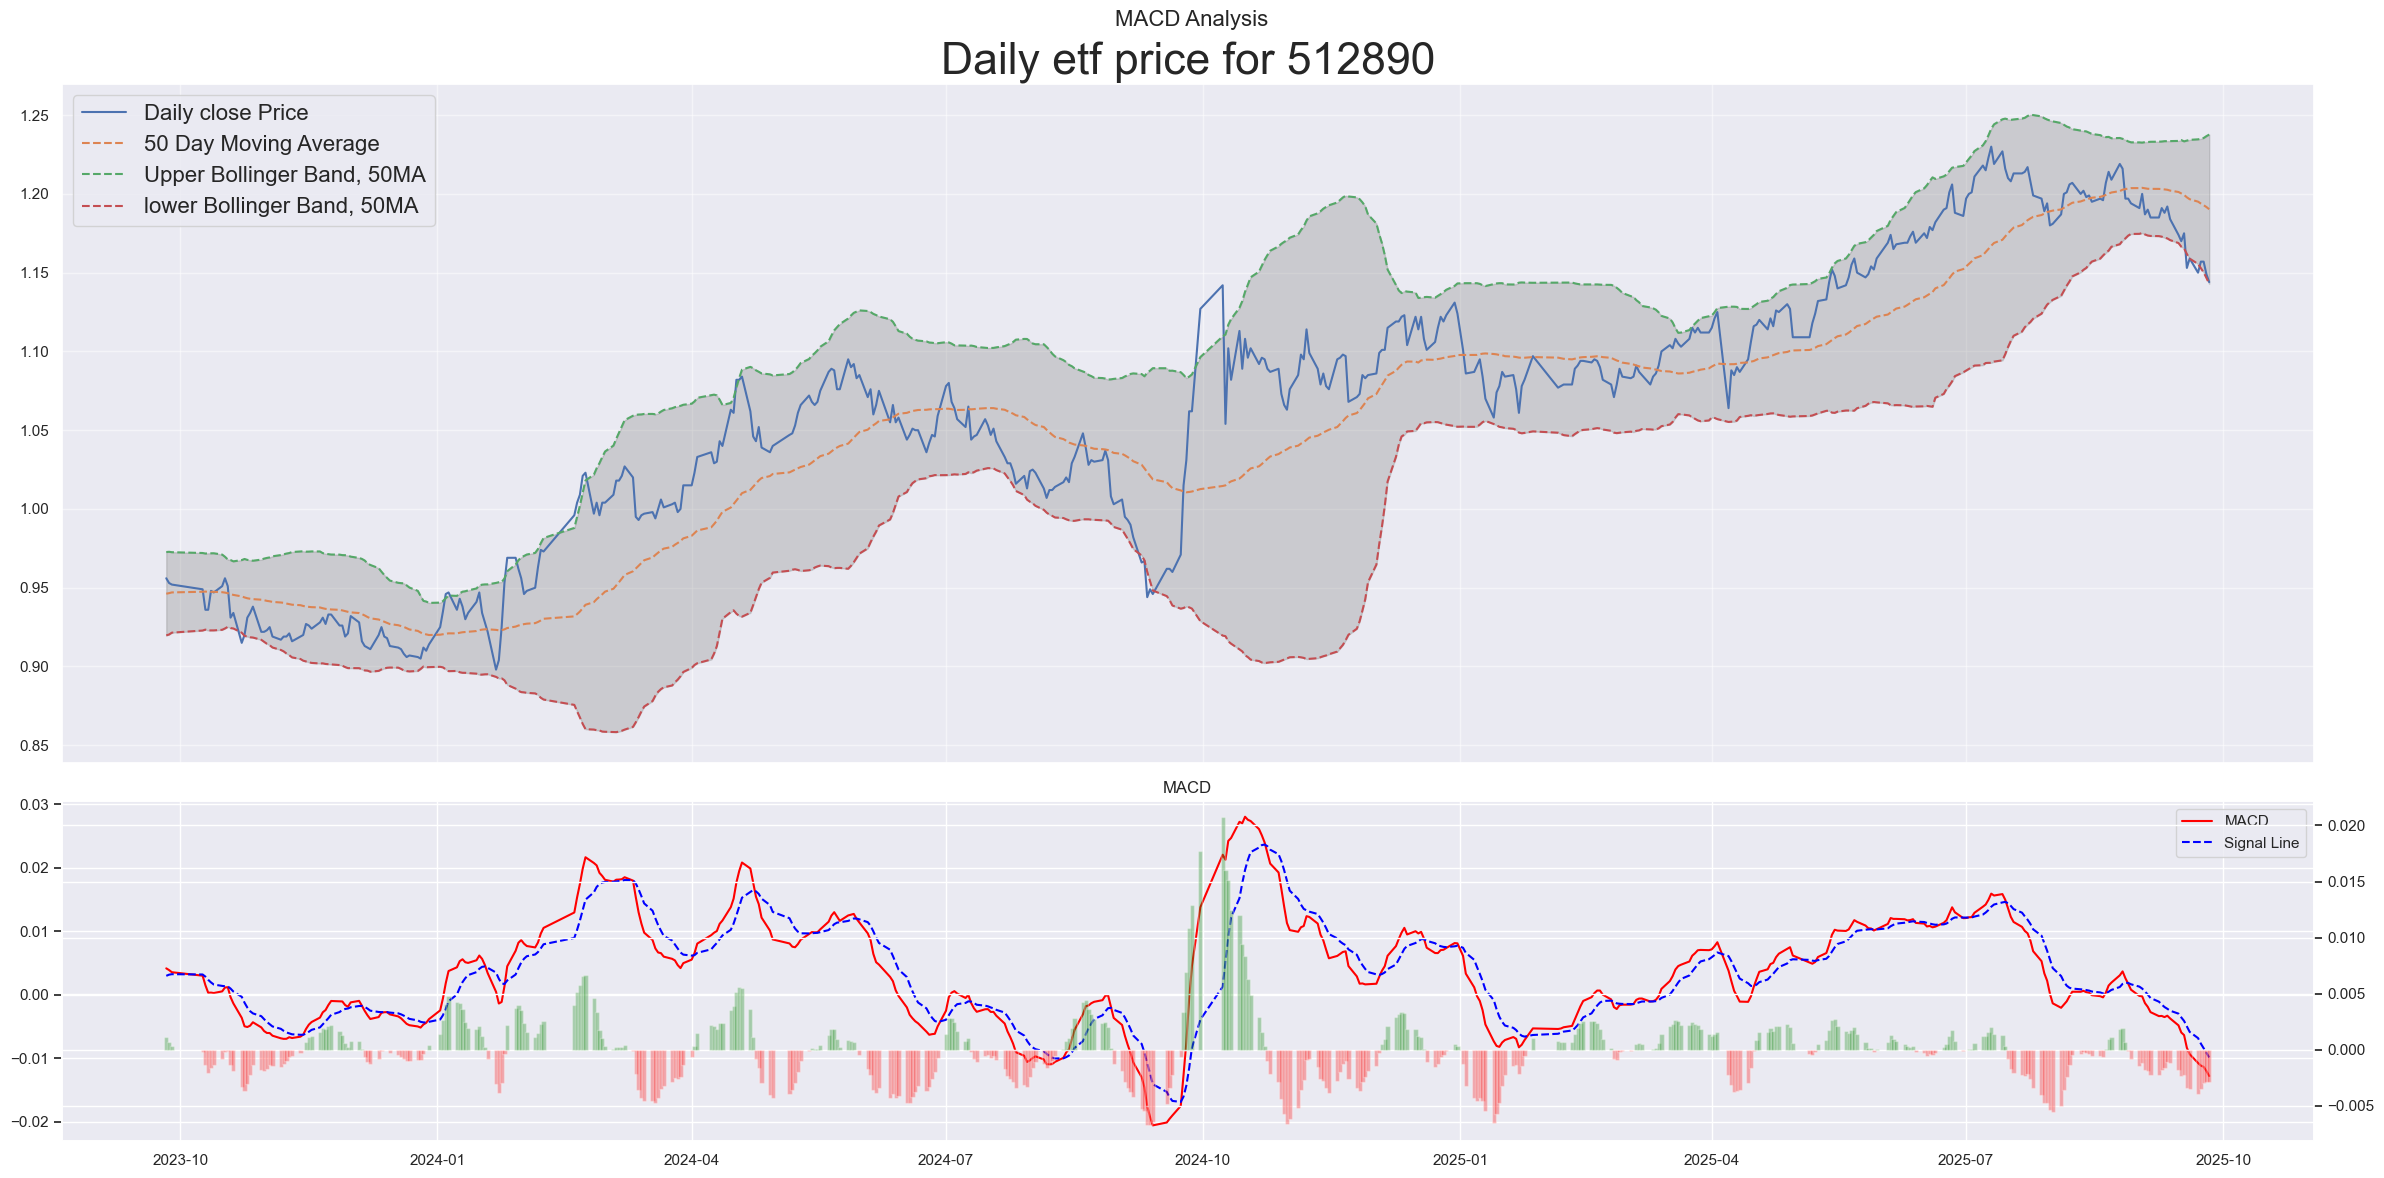

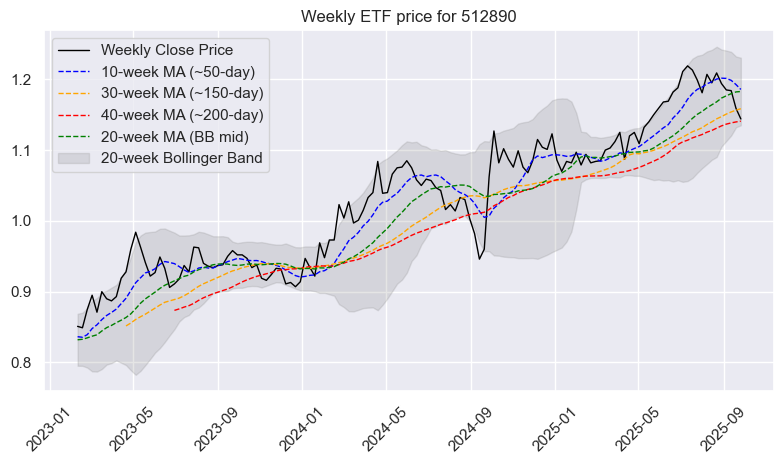

Current RSI: 24.18 
Current MACD Divergence: -0.0027 
Tomorrow inferred RSI: 25.0 
Tomorrow inferred MACD Divergence: -0.0023 
Regression price since launch: 1.2


In [4]:
# 红利低波
etf_code = "512890"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    print(f'Regression price since launch: {etf_regression(etf_code)}')
except:
    pass

* Current etf price: 1.41
* Recent high: 1.56
* Current etf price is at 90.49000000000001% of recent high
Latest 20 Day MA: 1.42
Latest lower Bollinger Band, 20MA: 1.4
Latest higher Bollinger Band, 20MA: 1.44
Latest 50 Day MA: 1.43
Latest lower Bollinger Band, 50MA: 1.39
Latest higher Bollinger Band, 50MA: 1.47
Latest 50 Day EMA: 1.42
Latest 120 Day MA: 1.39
Latest 200 Day MA: 1.37
Latest 200 Day EMA: 1.37
Latest 10 Week MA: 1.43
Latest 20 Week MA: 1.4
Latest 30 Week MA: 1.38
Latest 40 Week MA: 1.37
Latest Lower Weekly Bollinger Band, 20MA: 1.34
Latest Higher Weekly Bollinger Band, 20MA: 1.47

Latest RSI: 42.42 
Latest MACD Divergence: -0.0019 
20MA crosses 50MA at 1.79
20MA break point: 1.42
20MA lower Bollinger Band break point: 1.39
20MA Upper Bollinger Band break point: 1.44
50MA break point: 1.43
50MA lower Bollinger Band break point: 1.39
50MA Upper Bollinger Band break point: 1.47
120MA break point: 1.39
200MA break point: 1.37


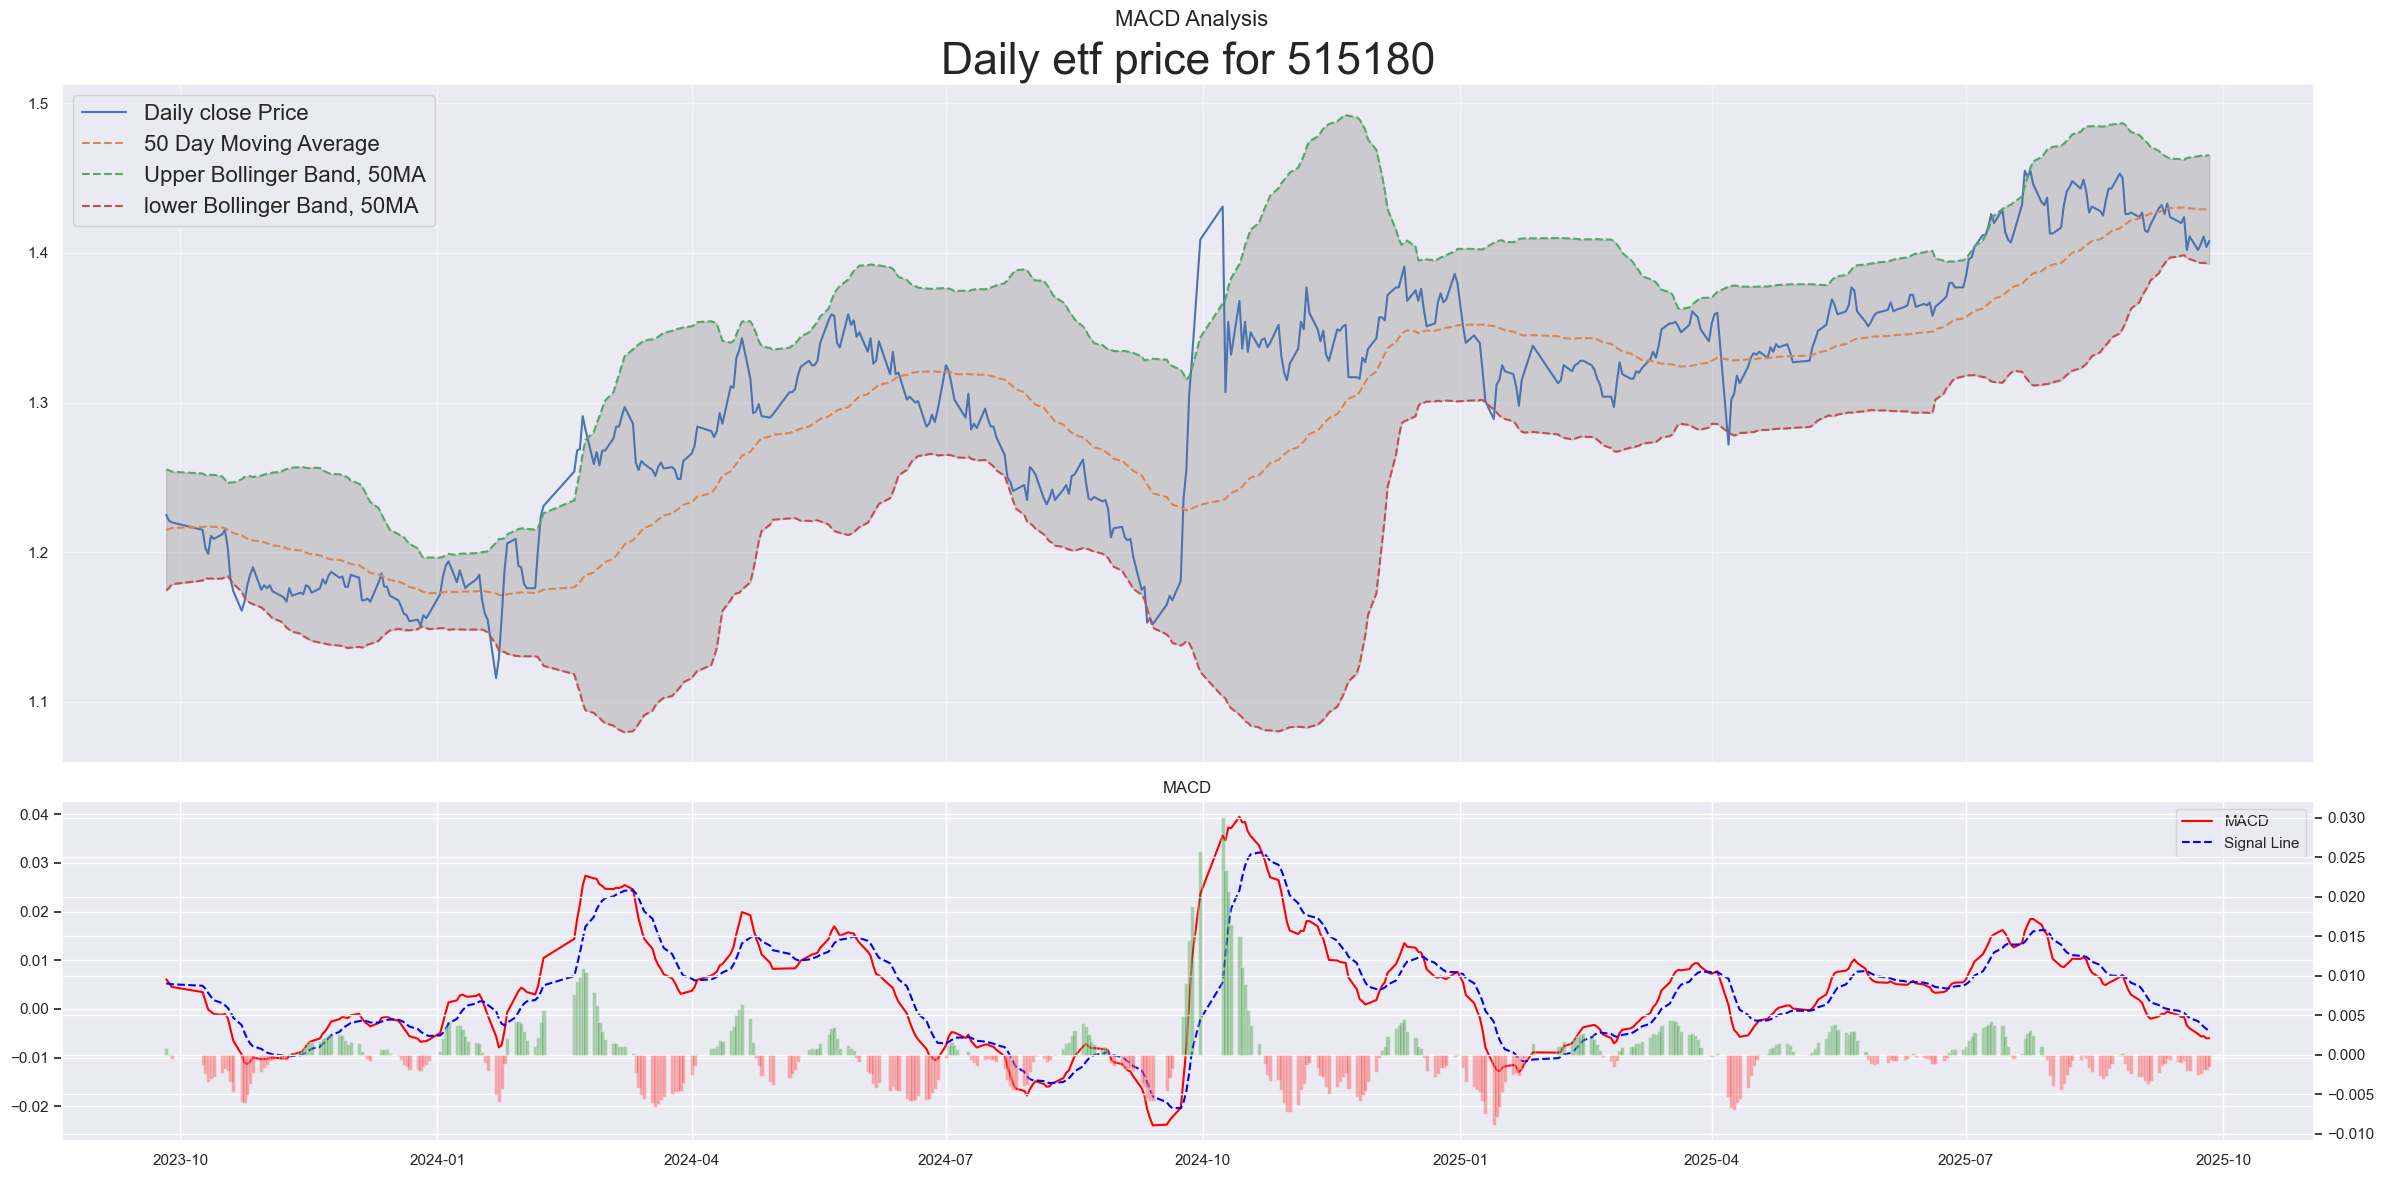

Current RSI: 36.67 
Current MACD Divergence: -0.0011 
Tomorrow inferred RSI: 39.29 
Tomorrow inferred MACD Divergence: -0.0008 


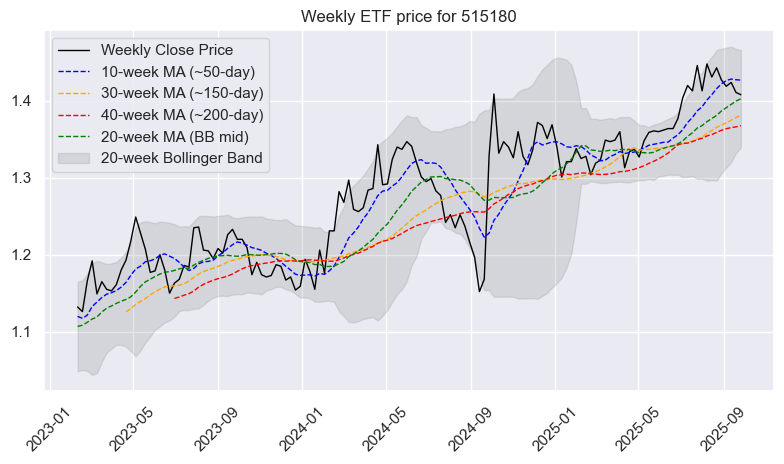

Regression price since launch: 1.45


In [5]:
# 红利
etf_code = "515180"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    print(f'Regression price since launch: {etf_regression(etf_code)}')
except:
    pass

* Current commodity price: 301    845.6
Name: 现价, dtype: float64
* Recent high: 857.0
* Current commodity price is at 301    98.67
Name: 现价, dtype: float64% of recent high
Latest 20 Day MA: 821.13
Latest lower Bollinger Band, 20MA: 779.88
Latest higher Bollinger Band, 20MA: 862.39
Latest 50 Day MA: 793.44
Latest lower Bollinger Band, 50MA: 727.29
Latest higher Bollinger Band, 50MA: 859.6
Latest 50 Day EMA: 801.62
Latest 120 Day MA: 780.75
Latest 200 Day MA: 731.98
Latest 200 Day EMA: 735.96
Latest 10 Week MA: 797.22
Latest 20 Week MA: 784.57
Latest 30 Week MA: 770.9
Latest 40 Week MA: 741.06
Latest Lower Weekly Bollinger Band, 20MA: 732.92
Latest Higher Weekly Bollinger Band, 20MA: 836.23

Latest RSI: 76.04 
Latest MACD Divergence: 2.02 
20MA break point: 823.3
20MA lower Bollinger Band break point: 779.88
20MA Upper Bollinger Band break point: 866.72
50MA break point: 793.9
50MA lower Bollinger Band break point: 722.07
50MA Upper Bollinger Band break point: 865.73
120MA break point: 7

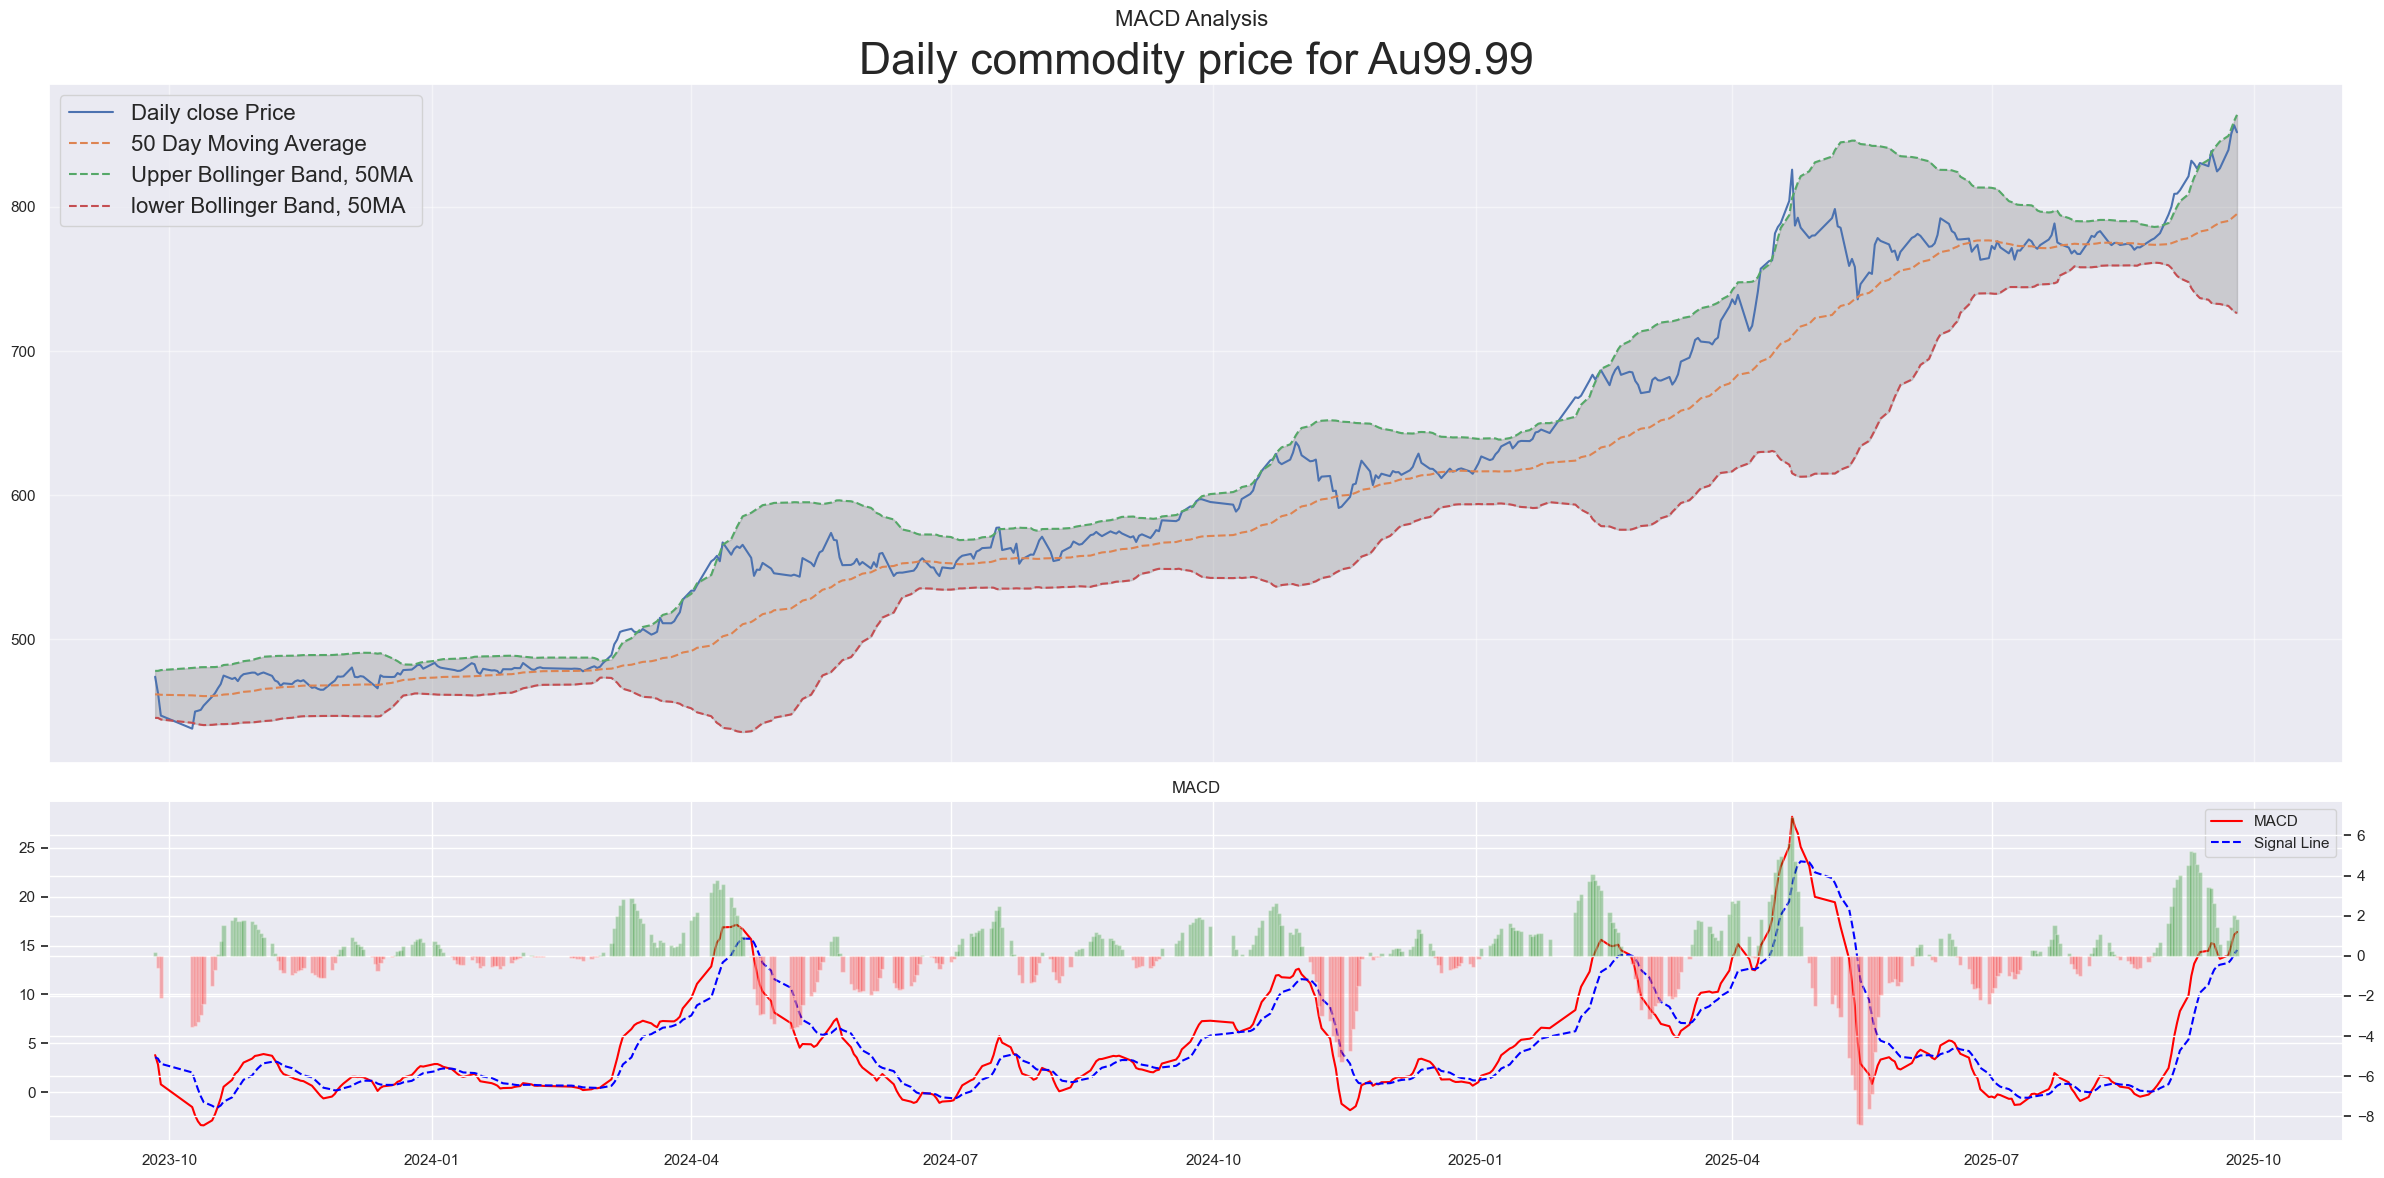

AttributeError: 'commodity_strategy' object has no attribute 'etf_code'

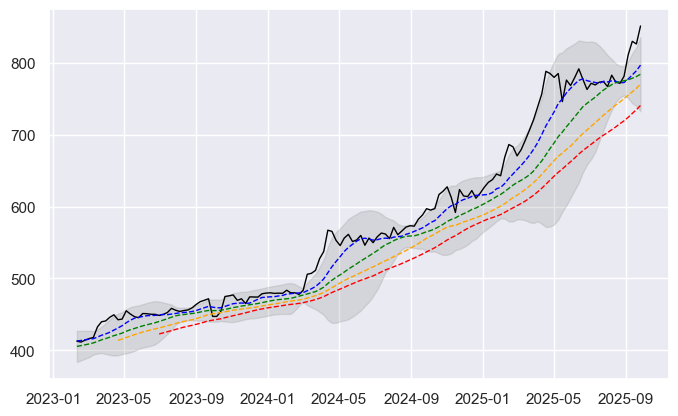

In [14]:
# 黄金
commodity_code = 'Au99.99'
try:
    stg = commodity_strategy(commodity_code)
    stg.output()
    stg.plot_weekly_chart()
except:
    pass

In [ ]:
# 传媒
etf_code = "512980"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 地产
etf_code = "159940"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 汽车
etf_code = "516110"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 恒生科技
etf_code = "513260"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 恒生医疗
etf_code = "513060"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 恒生
etf_code = "513660"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 恒生红利低波
etf_code = "159545"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 上证50
etf_code = "510050"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

In [ ]:
# 沪港深500
etf_code = "517000"
try:
    stg = etf_strategy(etf_code)
    stg.output()
    stg.latest_metric()
    stg.infer_metric()
except:
    pass

### 指数

/Users/yuchen/Documents/GitHub/trading_strategy/notebooks/../src/chinese_index_etf_strategy.py:283: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anchored_df['tp'] = (anchored_df['high'] + anchored_df['low'] + anchored_df['close']) / 3
/Users/yuchen/Documents/GitHub/trading_strategy/notebooks/../src/chinese_index_etf_strategy.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anchored_df['pv'] = anchored_df['tp'] * anchored_df['volume']


Latest anchored VWAP since 2025-07-01 is 7954.839205262742


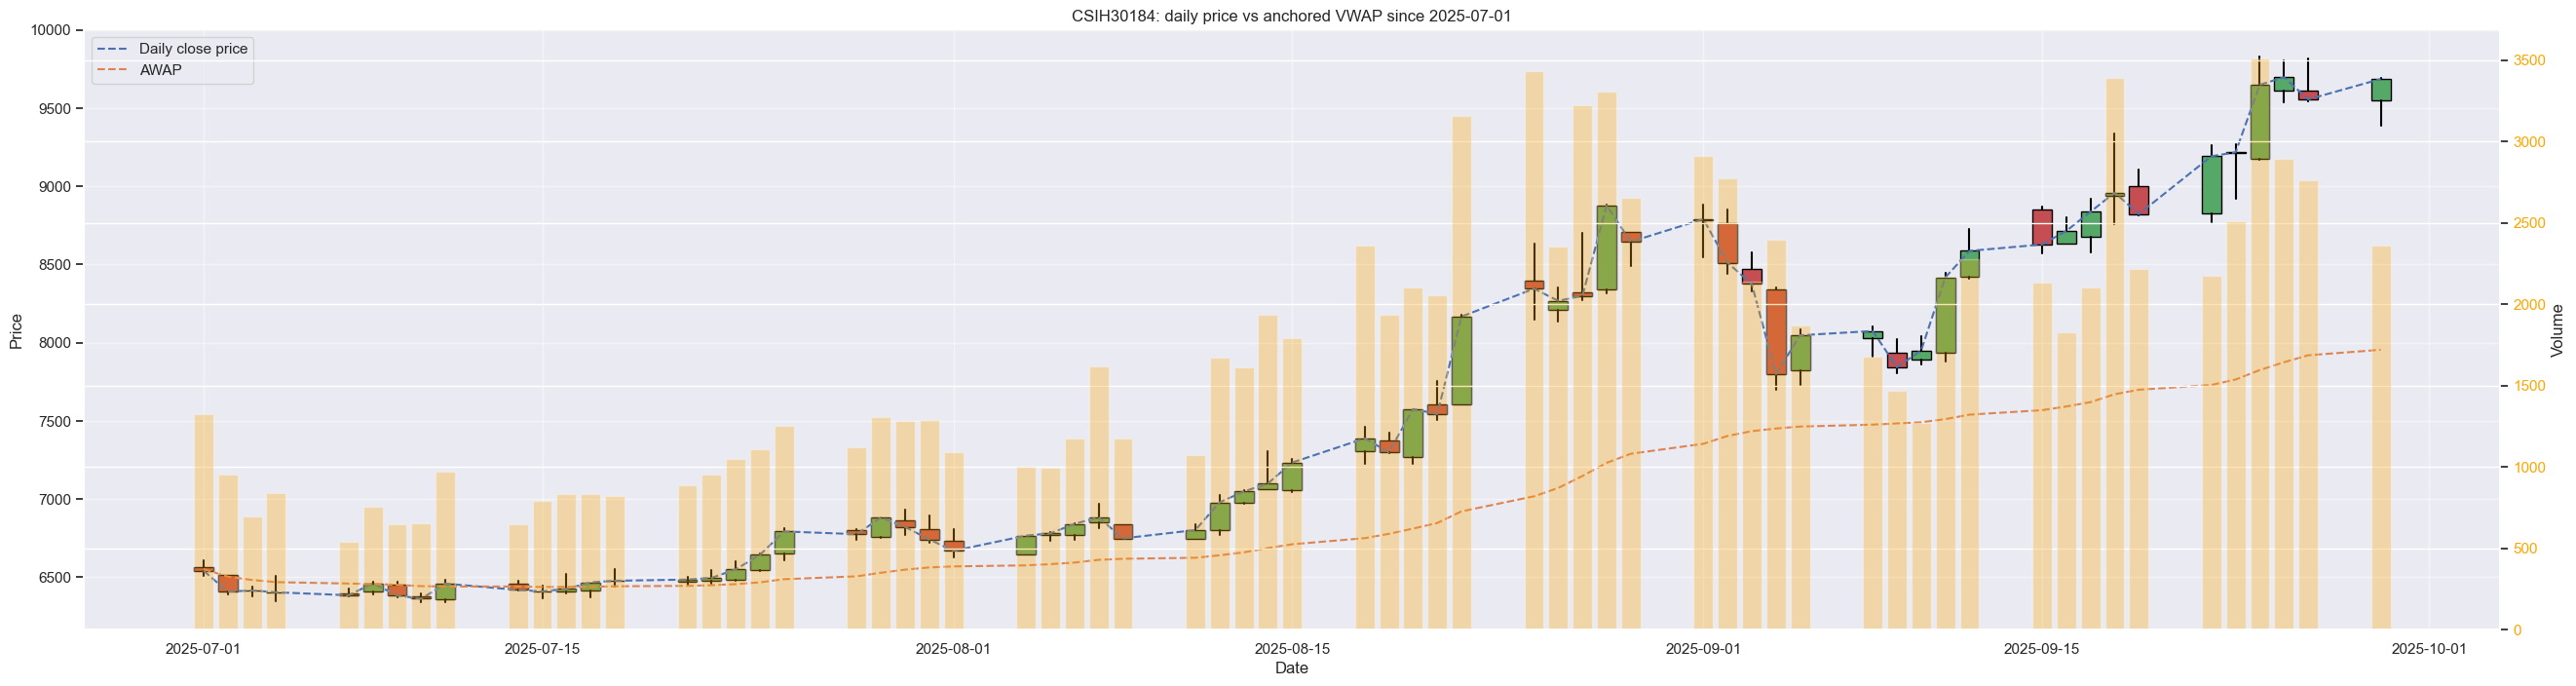

Latest 5D VWAP: 9526.32707973237
Latest 10D VWAP: 9250.14681809998
Latest 20D VWAP: 8821.079118433368
Latest 50D VWAP: 8139.272309345484
Latest 200D VWAP: 7116.502972023231


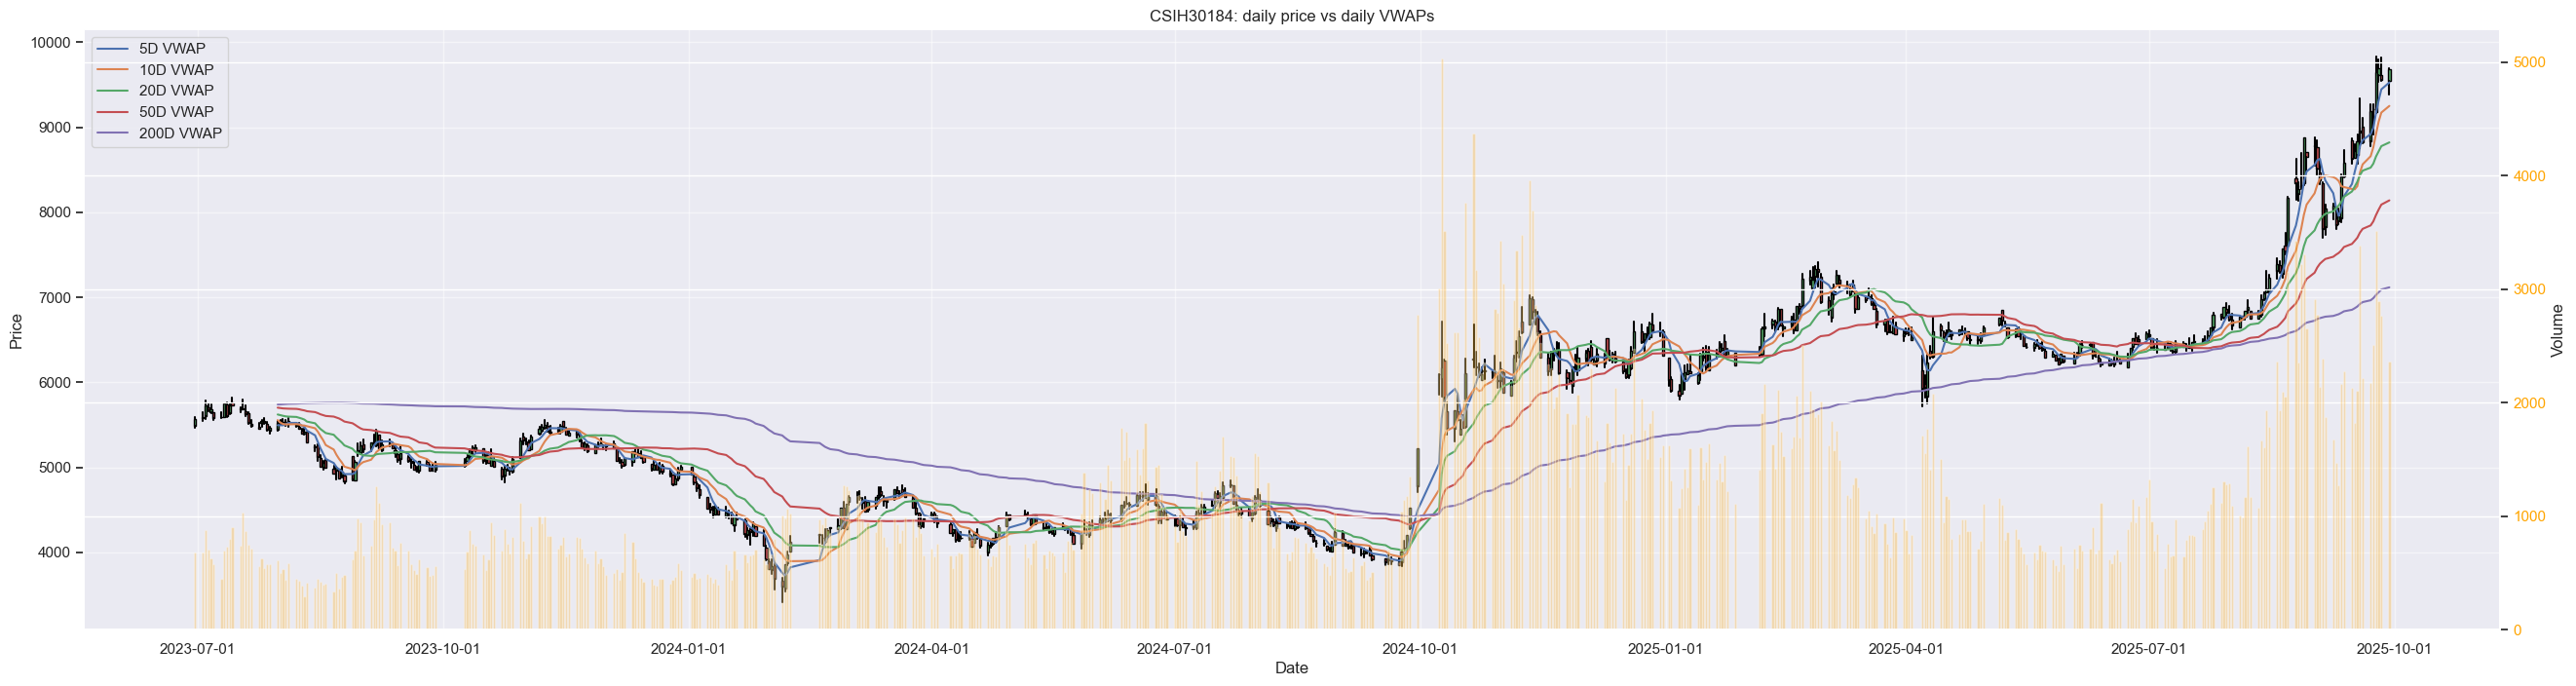

In [4]:
# 中证全指半导体指数
# etf_code = "csi931865" # 中证半导体
etf_code = 'CSIH30184'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.calculate_anchored_vwap(start_date='2025-07-01')
    stg.plot_daily_vwap()
except:
    pass

* Current etf price: 5474.39
* Recent high: 6209.67
* Current etf price is at 88.16000000000001% of recent high
Latest 20 Day MA: 5497.31
Latest lower Bollinger Band, 20MA: 5410.37
Latest higher Bollinger Band, 20MA: 5584.25
Latest 50 Day MA: 5547.06
Latest lower Bollinger Band, 50MA: 5390.67
Latest higher Bollinger Band, 50MA: 5703.45
Latest 50 Day EMA: 5514.81
Latest 120 Day MA: 5486.19
Latest 200 Day MA: 5451.88
Latest 200 Day EMA: 5453.95
Latest 10 Week MA: 5522.92
Latest 20 Week MA: 5501.49
Latest 30 Week MA: 5470.34
Latest 40 Week MA: 5436.37
Latest Lower Weekly Bollinger Band, 20MA: 5367.03
Latest Higher Weekly Bollinger Band, 20MA: 5635.95

Latest RSI: 38.21 
Latest MACD Divergence: -3.0798 
20MA crosses 50MA at 7132.66
20MA break point: 5498.52
20MA lower Bollinger Band break point: 5395.59
20MA Upper Bollinger Band break point: 5601.44
50MA break point: 5548.54
50MA lower Bollinger Band break point: 5379.86
50MA Upper Bollinger Band break point: 5717.23
120MA break point: 548

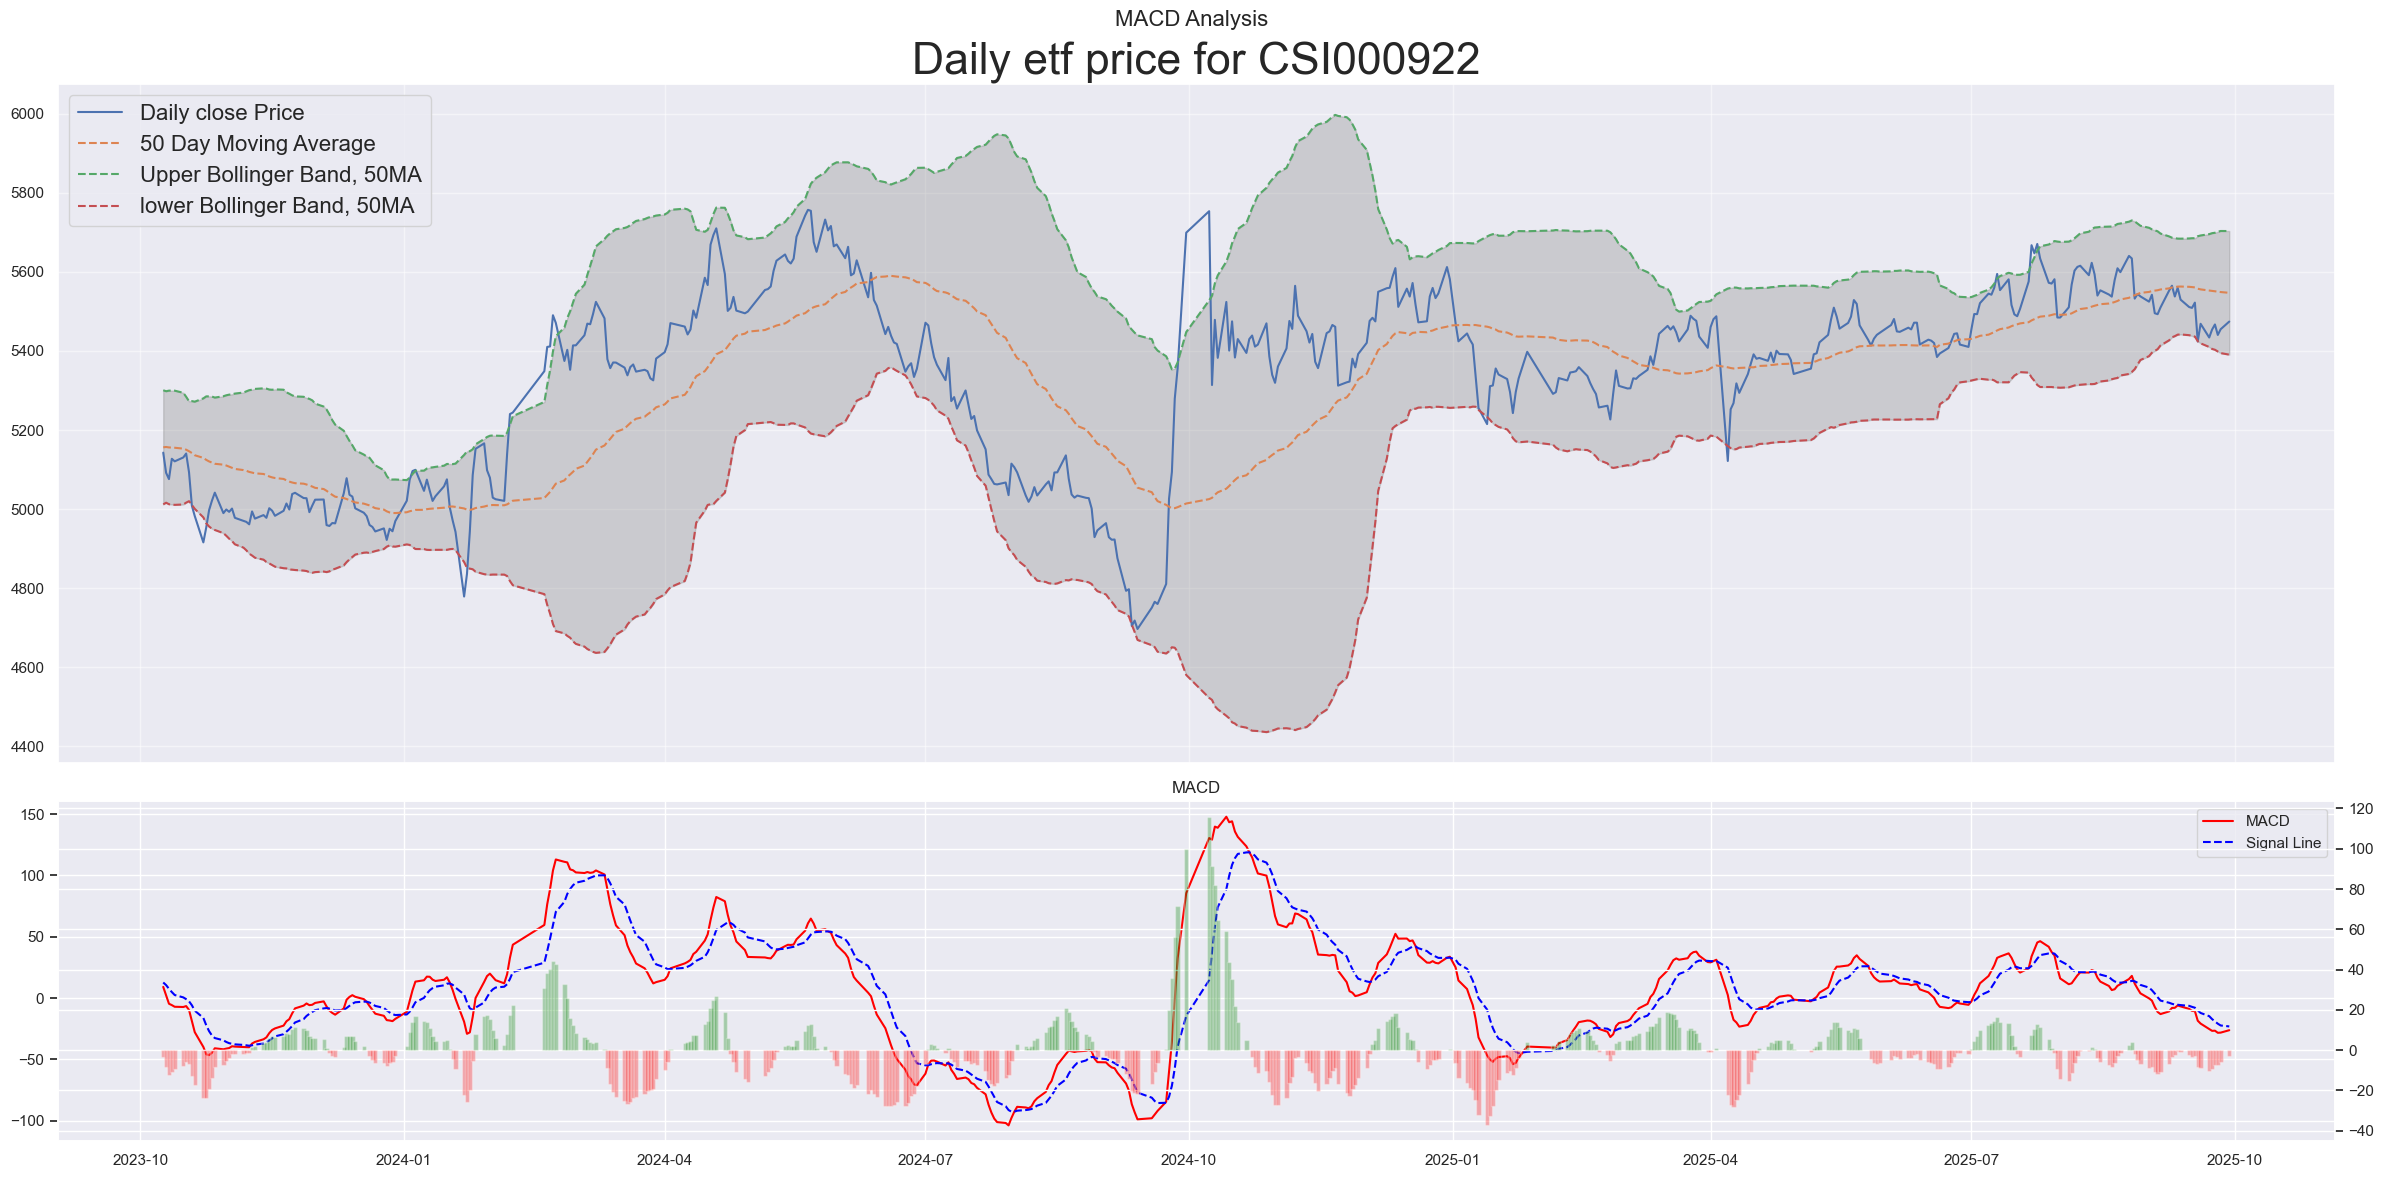

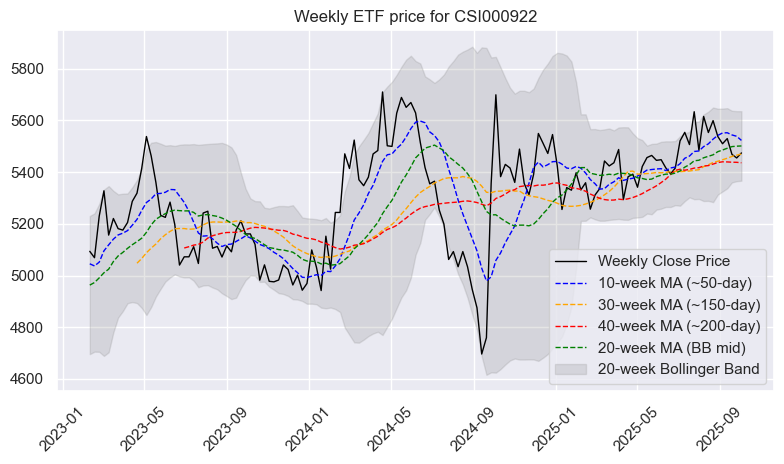

Current RSI: 41.12 
Current MACD Divergence: -0.989 
Tomorrow inferred RSI: 37.25 
Tomorrow inferred MACD Divergence: 0.5857 


In [4]:
# 红利指数
etf_code = 'csi000922'
try:
    stg = etf_strategy(etf_code, source="index")
    stg.output()
    stg.plot_weekly_chart()
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    # stg.plot_daily_vwap()
except:
    pass

* Current etf price: 16437.27 ~ up 16911.1 , down 16292.93
* Recent high: 22442.98
* Current etf price is at 73.24000000000001% of recent high
Latest 20 Day MA: 16778.6
Latest lower Bollinger Band, 20MA: 16139.8
Latest higher Bollinger Band, 20MA: 17417.39
Latest 50 Day MA: 16437.55
Latest lower Bollinger Band, 50MA: 15261.26
Latest higher Bollinger Band, 50MA: 17613.84
Latest 50 Day EMA: 16481.25
Latest 120 Day MA: 16216.84
Latest 200 Day MA: 16114.2
Latest 200 Day EMA: 16248.39
Latest 10 Week MA: 16431.42
Latest 20 Week MA: 16152.26
Latest 30 Week MA: 16222.66
Latest 40 Week MA: 16051.5
Latest Lower Weekly Bollinger Band, 20MA: 15189.18
Latest Higher Weekly Bollinger Band, 20MA: 17115.33

Latest RSI: 29.98 
Latest MACD Divergence: -101.6216 
20MA crosses 50MA at 5068.98
20MA break point: 16796.56
20MA lower Bollinger Band break point: 16058.92
20MA Upper Bollinger Band break point: 17534.2
50MA break point: 16437.56
50MA lower Bollinger Band break point: 15150.59
50MA Upper Bollinger

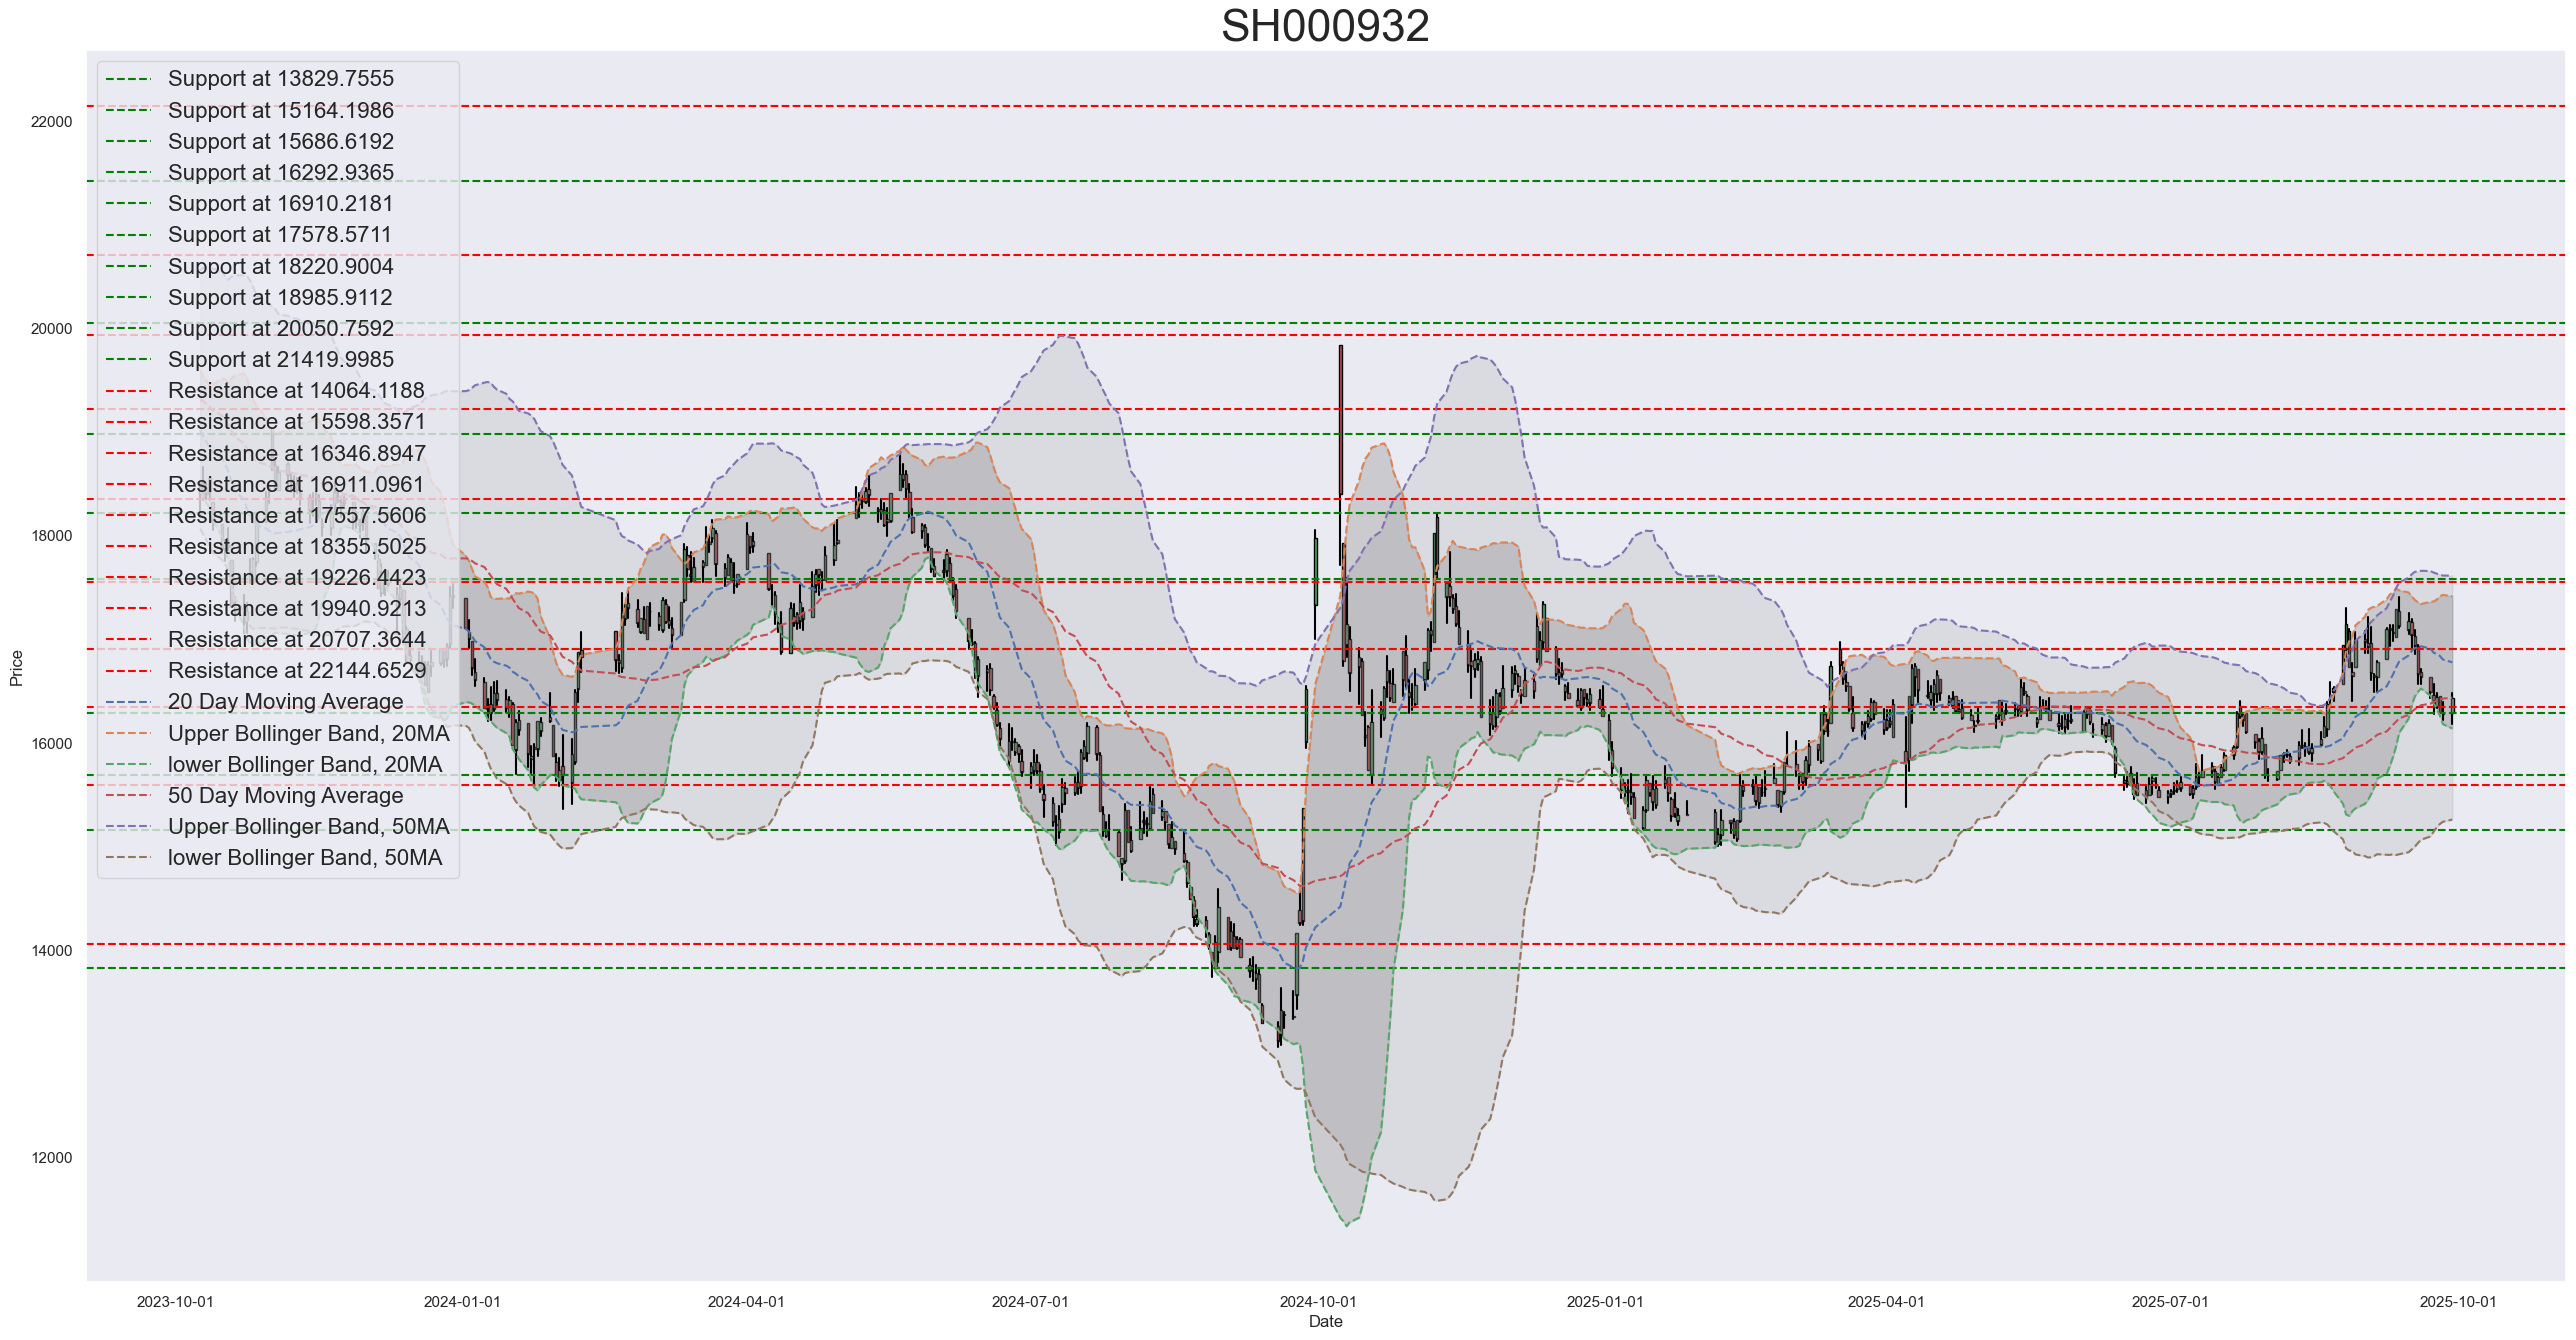

In [5]:
# 中证消费
etf_code = 'sh000932'
try:
    stg = etf_strategy(etf_code, strategy='daily', source="index")
    stg.output()
    # stg.plot_weekly_chart() # not useful
    stg.latest_metric()
    stg.infer_metric()
    # stg.calculate_anchored_vwap(start_date='2025-07-01')
    # stg.plot_daily_vwap()
except:
    pass

### Test a "momentum driven" strategy

In [ ]:
def backtest_momentum_strategy(price_df, initial_cash=100_000, cycle=21, window=20, sell_early=False):
    """
    Backtest the momentum strategy with X-trading-day evaluation cycle.
    Returns:
        result_df: Daily portfolio value DataFrame
        actions_df: Log of only buy/sell actions
    """
    price_df = price_df.sort_index()
    
    # cycle-day moving average
    ma = price_df.rolling(window=window).mean()
    
    # cycle-day % change
    pct_change = price_df.pct_change(cycle)
    
    # Portfolio state
    cash = initial_cash
    shares = 0
    current_stock = None
    portfolio_values = []
    actions = []

    dates = price_df.index
    
    # for i in range(cycle, len(dates)):  # start from the 22nd trading day
    for i in range(cycle, 21*13):  # Check performance for one year
        date = dates[i]
        
        # Step (1): every cycle trading days, rebalance
        if (i - cycle) % cycle == 0:
            # Sell previous stock if any
            if current_stock is not None:
                sell_price = price_df.loc[date, current_stock]
                cash += shares * sell_price
                actions.append([date, "SELL", current_stock, sell_price, shares])
                shares = 0
                current_stock = None
            
            # Find candidates above ma
            candidates = [s for s in price_df.columns 
                          if price_df.loc[date, s] > ma.loc[date, s]]
            
            if candidates:
                # Pick stock with largest cycle-day % change
                stock_changes = pct_change.loc[date, candidates]
                pick = stock_changes.idxmax()
                buy_price = price_df.loc[date, pick]
                current_stock = pick
                shares = cash // buy_price
                cash -= shares * buy_price
                actions.append([date, "BUY", pick, buy_price, shares])
        
        # Step (2): sell early if price drops below ma
        if sell_early and current_stock is not None:
            if price_df.loc[date, current_stock] < ma.loc[date, current_stock]:
                sell_price = price_df.loc[date, current_stock]
                cash += shares * sell_price
                actions.append([date, "SELL_EARLY", current_stock, sell_price, shares])
                shares = 0
                current_stock = None
        
        # Record portfolio value
        if current_stock is not None:
            value = cash + shares * price_df.loc[date, current_stock]
        else:
            value = cash
        portfolio_values.append((date, value))
    
    # Create results DataFrames
    result_df = pd.DataFrame(portfolio_values, columns=["Date", "PortfolioValue"])
    result_df.set_index("Date", inplace=True)
    
    actions_df = pd.DataFrame(actions, columns=["Date", "Action", "Stock", "Price", "Shares"])
    actions_df.set_index("Date", inplace=True)
    
    total_days = len(result_df)
    final_value = result_df["PortfolioValue"].iloc[-1]
    annualized_return = (final_value / initial_cash) ** (252 / total_days) - 1
    
    return result_df, actions_df, annualized_return


def average_annualized_return(price_df, initial_cash=100_000, n_test=100, cycle=21, window=20, sell_early=False):
    """
    Runs the strategy from different starting offsets (0-20) and averages annualized return.
    """
    returns = []
    for offset in range(n_test):  # 100 possible start offsets
        sliced_df = price_df.iloc[offset:].copy()
        if len(sliced_df) < 42:  # ensure enough data for lookback + holding
            continue
        _, _, ann_return = backtest_momentum_strategy(sliced_df, initial_cash, cycle=cycle, window=window, sell_early=sell_early)
        returns.append(ann_return)
    print(f"Average return: {np.mean(returns) if returns else np.nan}")
    print(f"Return STD: {np.std(returns) if returns else np.nan}")

    return returns

In [ ]:
etf_list = [
"516570",
"512820",
"512260",
"512480",
"512580",
"159948",
"562500",
"159819",
"512600",
"560880",
"512400",
# "159697", # history too short
"515880",
"516080",
"159647",
"515220",
"512890",
"512980",
"159940",
"516110",
"513260",
"513060",
"513660",
# "159545", # history too short
"510050",
]
etf_code = etf_list[0]

df_all = ak.fund_etf_hist_em(
            symbol=etf_code.upper(),
            start_date=(datetime.today() - relativedelta(years=5)).strftime('%Y%m%d'),
            end_date=datetime.today().strftime('%Y%m%d'),
            period='daily',  # Default to daily,
            adjust='qfq'
)
df_all = df_all[['日期','收盘']].set_index('日期')
df_all = df_all.rename(columns={'收盘': etf_code})
for etf_code in etf_list[1:]:
    df = ak.fund_etf_hist_em(
            symbol=etf_code.upper(),
            start_date=(datetime.today() - relativedelta(years=5)).strftime('%Y%m%d'),
            end_date=datetime.today().strftime('%Y%m%d'),
            period='daily',  # Default to daily,
            adjust='qfq'
    )[['日期','收盘']].set_index('日期')
    df = df.rename(columns={'收盘': etf_code})
    df_all = pd.merge(df_all, df, left_index=True, right_index=True, how='inner')
df_all

In [ ]:
returns = average_annualized_return(df_all, initial_cash=100000, cycle=21, window=50)

In [ ]:
returns = average_annualized_return(df_all, initial_cash=100000, cycle=21, window=20)

In [ ]:
result_df, actions_df, annualized_return = backtest_momentum_strategy(df_all, cycle=21, window=20)
print(annualized_return)
result_df

In [ ]:
actions_df

In [ ]:
# benchmark
good_etfs = {
    "honglidibo": "512890",
    "hongli": "515180"}
for etf in good_etfs:
    etf_code = good_etfs[etf]
    df_etf = etf_strategy(etf_code, start='20150101').return_result()
    df_etf.set_index('date',inplace=True)
    valid_start_range = range(0, len(df_etf) - 252)
    start_points = np.random.choice(valid_start_range, size=800, replace=False)
    returns = []
    for start in start_points:
        dates = df_etf.index
        initial_date = dates[start]
        end_date = dates[start + 252]
        initial_price = df_etf.loc[initial_date]['close']
        end_price = df_etf.loc[end_date]['close']
        returns.append(end_price/initial_price - 1)
    print(etf)
    print(f"Average return: {np.mean(returns) if returns else np.nan}")
    print(f"Return STD: {np.std(returns) if returns else np.nan}")
    print(f"earning-cost ratio: {abs((np.mean(returns)+1.96*np.std(returns))/(np.mean(returns)-1.96*np.std(returns))) if returns else np.nan}")

In [ ]:
etf_regression("512890", detailed=True)

In [ ]:
etf_regression("515180", detailed=True)